# Import library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
print('Setup Completed!')

Setup Completed!


# Import Data:

In [2]:
df = pd.read_excel('data_processed_2023_updated.xlsx')
df

,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,Đặc tính sản phẩm,Đặc tính sản phẩm2,Brand,DVT,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram
0,1,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,PHỔ THÔNG,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.000000
1,2,729417,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,2023-02-20,2023-02-26 22:36:06.803,1053109000068,1861,1910000362,KD bình thường,6,...,PHỔ THÔNG,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.000000
2,3,731524,CTKM BỔ SUNG THÁNG 3 (27/02-12/03) -3288,2023-02-27,2023-03-12 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,PHỔ THÔNG,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.000000
3,4,749181,CTKM BỔ SUNG THÁNG 3 (20/03-02/04) -3288,2023-03-20,2023-04-02 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,PHỔ THÔNG,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.000000
4,5,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000079,1861,2006000203,KD bình thường,6,...,PHỔ THÔNG,CAY,NAM DƯƠNG,Chai,1,800G,LỚN,RẺ,800,2625.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29689,29690,679786,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000157,9160,2210001569,KD bình thường,1,...,VỊ HÀN QUỐC,VỊ HÀN QUỐC,BIBIGO,Chai,1,260G,NHỎ,TRUNG,260,8846.153846
29690,29691,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000079,9160,2006000203,KD bình thường,2,...,PHỔ THÔNG,CAY,NAM DƯƠNG,Chai,1,800G,LỚN,RẺ,800,2625.000000
29691,29692,726144,CTKM THÁNG 2 (13/02-30/04) -3288,2023-02-13,2023-02-26 22:36:06.814,1053109000157,9160,2210001569,KD bình thường,1,...,VỊ HÀN QUỐC,VỊ HÀN QUỐC,BIBIGO,Chai,1,260G,NHỎ,TRUNG,260,8846.153846
29692,29693,751331,CTKM BỔ SUNG THÁNG 3 (27/03-04/09) - GIẢM G...,2023-03-27,2023-09-04 23:59:00.000,1053109000079,9160,2006000203,KD bình thường,2,...,PHỔ THÔNG,CAY,NAM DƯƠNG,Chai,1,800G,LỚN,RẺ,800,2625.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29694 entries, 0 to 29693
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   stt                                 29694 non-null  int64         
 1   promotionid                         29694 non-null  int64         
 2   promotionname                       29694 non-null  object        
 3   fromdate                            29694 non-null  datetime64[ns]
 4   todate                              29694 non-null  datetime64[ns]
 5   productid                           29694 non-null  int64         
 6   storeid                             29694 non-null  int64         
 7   itemid                              29694 non-null  int64         
 8   statusname                          29694 non-null  object        
 9   facing                              29694 non-null  int64         
 10  itemtype              

# K-Prototypes Clustering Part 1:

In [5]:
df_new = df[['facing','itemtype','Hình thức KM','Tỷ lệ KM','quarter', 'pct_holiday','TGKM','TT theo so luong','Miền','Mô hình','Loại ST','Đặc tính sản phẩm2','Brand','Khối lượng gram','Giá/100gram']]
#df_new

In [6]:
col_cat = [df_new.columns.get_loc(col) for col in list(df_new.select_dtypes('object').columns)]
col_cat

[1, 2, 8, 9, 10, 11, 12]

In [7]:
X = df_new.values

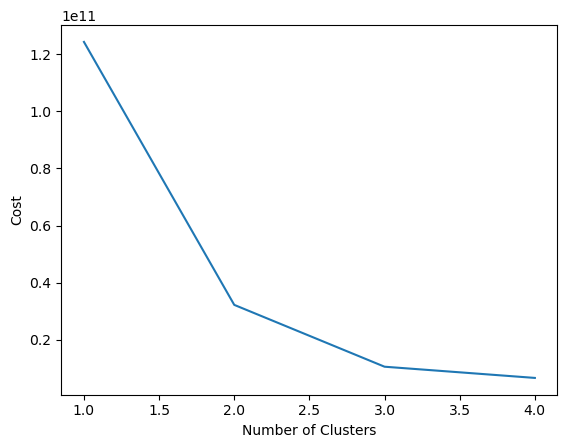

In [8]:
cost = []
for num_clusters in range(1,5):
    kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Cao', verbose=0) # Huang, Cao
    kproto.fit_predict(X, categorical=col_cat)
    cost.append(kproto.cost_)

plt.plot(range(1,5), cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [9]:
from kneed import KneeLocator
kn = KneeLocator(range(1,5), cost, curve='convex', direction='decreasing', S=0.1, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 2


In [10]:
kproto = KPrototypes(n_jobs=-1, n_clusters= kn.elbow, init='Cao', verbose=0) 
clusters = kproto.fit_predict(X, categorical=col_cat)
df['Cluster'] = clusters
df.head()

,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,Đặc tính sản phẩm2,Brand,DVT,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster
0,1,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0
1,2,729417,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,2023-02-20,2023-02-26 22:36:06.803,1053109000068,1861,1910000362,KD bình thường,6,...,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0
2,3,731524,CTKM BỔ SUNG THÁNG 3 (27/02-12/03) -3288,2023-02-27,2023-03-12 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0
3,4,749181,CTKM BỔ SUNG THÁNG 3 (20/03-02/04) -3288,2023-03-20,2023-04-02 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,CAY,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0
4,5,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000079,1861,2006000203,KD bình thường,6,...,CAY,NAM DƯƠNG,Chai,1,800G,LỚN,RẺ,800,2625.0,0


In [11]:
cluster_num_part1 = df.groupby('Cluster').size().sort_values(ascending = False).reset_index()
cluster_num_part1

,Cluster,0
0,0,19513
1,1,10181


# K-Prototypes Part 2:

In [12]:
df_0 = df[df['Cluster'] == 0]
df_1 = df[df['Cluster'] == 1]

## Tách cụm 0

In [14]:
df_0_new = df_0[['facing','itemtype','Hình thức KM','Tỷ lệ KM','quarter', 'pct_holiday','TGKM','TT theo so luong','Miền','Mô hình','Loại ST','Đặc tính sản phẩm2','Brand','Khối lượng gram','Giá/100gram']]
#df_0_new

In [16]:
X0 = df_0_new.values

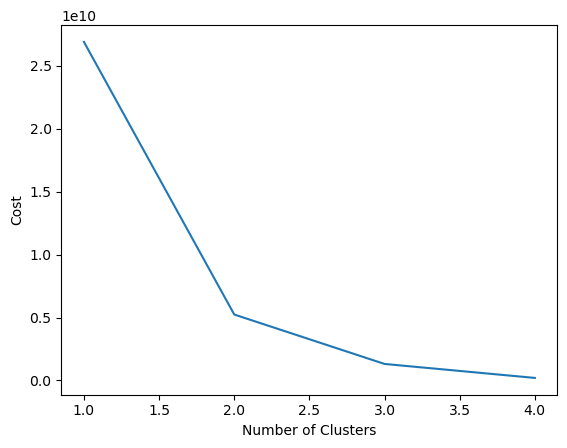

In [17]:
cost = []
for num_clusters in range(1,5):
    kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Cao', verbose=0)
    kproto.fit_predict(X0, categorical=col_cat)
    cost.append(kproto.cost_)

plt.plot(range(1,5), cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [18]:
from kneed import KneeLocator
kn = KneeLocator(range(1,5), cost, curve='convex', direction='decreasing', S=0.1, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 2


In [46]:
kproto = KPrototypes(n_jobs=-1, n_clusters= kn.elbow, init='Cao', verbose=0) 
clusters = kproto.fit_predict(X0, categorical=col_cat)
df_0['Cluster_1'] = clusters
df_0.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2142138598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Cluster_1'] = clusters


,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,Brand,DVT,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1
0,1,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1
1,2,729417,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,2023-02-20,2023-02-26 22:36:06.803,1053109000068,1861,1910000362,KD bình thường,6,...,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1
2,3,731524,CTKM BỔ SUNG THÁNG 3 (27/02-12/03) -3288,2023-02-27,2023-03-12 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1
3,4,749181,CTKM BỔ SUNG THÁNG 3 (20/03-02/04) -3288,2023-03-20,2023-04-02 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,CHINSU,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1
4,5,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000079,1861,2006000203,KD bình thường,6,...,NAM DƯƠNG,Chai,1,800G,LỚN,RẺ,800,2625.0,0,0


## Chia nhỏ thêm cụm 0:

### Cụm 0-0

In [48]:
df_00 = df_0[df_0['Cluster_1'] == 0]
df_01 = df_0[df_0['Cluster_1'] == 1]

In [49]:
df_00_new = df_00[['facing','itemtype','Hình thức KM','Tỷ lệ KM','quarter', 'pct_holiday','TGKM','TT theo so luong','Miền','Mô hình','Loại ST','Đặc tính sản phẩm2','Brand','Khối lượng gram','Giá/100gram']]

In [50]:
X00 = df_00_new.values

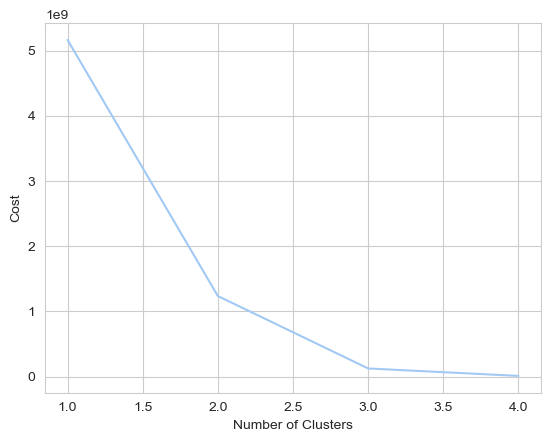

In [51]:
cost = []
for num_clusters in range(1,5):
    kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Cao', verbose=0)
    kproto.fit_predict(X00, categorical=col_cat)
    cost.append(kproto.cost_)

plt.plot(range(1,5), cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [52]:
from kneed import KneeLocator
kn = KneeLocator(range(1,5), cost, curve='convex', direction='decreasing', S=0.1, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 2


In [53]:
kproto = KPrototypes(n_jobs=-1, n_clusters= kn.elbow, init='Cao', verbose=0) 
clusters = kproto.fit_predict(X00, categorical=col_cat)
df_00['Cluster_2'] = clusters
df_00.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2282597763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['Cluster_2'] = clusters


,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,DVT,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1,Cluster_2
4,5,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00,1053109000079,1861,2006000203,KD bình thường,6,...,Chai,1,800G,LỚN,RẺ,800,2625.000000,0,0,0
5,6,700398,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,2022-12-19,2023-01-01 23:59:00,1053109000151,1861,2206001907,KD bình thường,3,...,Chai,1,255G,NHỎ,RẺ,255,4235.294118,0,0,1
9,10,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00,9892840000187,2786,1608000500,KD bình thường,1,...,Chai,1,830G,LỚN,RẺ,830,3518.072289,0,0,1
11,12,679814,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00,1053109000060,4483,1908000184,KD bình thường,4,...,Chai,1,470G,TRUNG,RẺ,470,3553.191489,0,0,1
14,15,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00,9892840000187,4573,1608000500,KD bình thường,1,...,Chai,1,830G,LỚN,RẺ,830,3518.072289,0,0,1


### Cụm 0-1

In [54]:
df_01_new = df_01[['facing','itemtype','Hình thức KM','Tỷ lệ KM','quarter', 'pct_holiday','TGKM','TT theo so luong','Miền','Mô hình','Loại ST','Đặc tính sản phẩm2','Brand','Khối lượng gram','Giá/100gram']]

In [55]:
X01 = df_01_new.values

In [57]:
kproto = KPrototypes(n_jobs=-1, n_clusters= 2, init='Cao', verbose=0) 
clusters = kproto.fit_predict(X01, categorical=col_cat)
df_01['Cluster_2'] = clusters
df_01.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/4064289804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01['Cluster_2'] = clusters


,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,DVT,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1,Cluster_2
0,1,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1
1,2,729417,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,2023-02-20,2023-02-26 22:36:06.803,1053109000068,1861,1910000362,KD bình thường,6,...,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1
2,3,731524,CTKM BỔ SUNG THÁNG 3 (27/02-12/03) -3288,2023-02-27,2023-03-12 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1
3,4,749181,CTKM BỔ SUNG THÁNG 3 (20/03-02/04) -3288,2023-03-20,2023-04-02 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1
6,7,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,2453,1910000362,KD bình thường,5,...,Chai,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1


### Cụm 0-1-1:

In [66]:
df_010 = df_01[df_01['Cluster_2'] == 0]
df_011 = df_01[df_01['Cluster_2'] == 1]

In [67]:
df_011_new = df_011[['facing','itemtype','Hình thức KM','Tỷ lệ KM','quarter', 'pct_holiday','TGKM','TT theo so luong','Miền','Mô hình','Loại ST','Đặc tính sản phẩm2','Brand','Khối lượng gram','Giá/100gram']]

In [68]:
X011 = df_011_new.values

In [70]:
kproto = KPrototypes(n_jobs=-1, n_clusters= 2, init='Cao', verbose=0) 
clusters = kproto.fit_predict(X011, categorical=col_cat)
df_011['Cluster_3'] = clusters
df_011.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2402971692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_011['Cluster_3'] = clusters


,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1,Cluster_2,Cluster_3
0,1,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1,0
1,2,729417,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,2023-02-20,2023-02-26 22:36:06.803,1053109000068,1861,1910000362,KD bình thường,6,...,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1,0
2,3,731524,CTKM BỔ SUNG THÁNG 3 (27/02-12/03) -3288,2023-02-27,2023-03-12 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1,0
3,4,749181,CTKM BỔ SUNG THÁNG 3 (20/03-02/04) -3288,2023-03-20,2023-04-02 23:59:00.000,1053109000068,1861,1910000362,KD bình thường,6,...,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1,0
6,7,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,2453,1910000362,KD bình thường,5,...,1,500G,TRUNG,TRUNG,500,5600.0,0,1,1,0


In [71]:
df_01 = pd.concat([df_010, df_011])
df_01

,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1,Cluster_2,Cluster_3
42,43,701177,CTKM THÁNG 1 (02/01-20/01) MUA 2 TẶNG 1-3288,2023-01-02,2023-01-20 23:59:00.000,1053109000028,8666,1811001199,KD bình thường,1,...,0,290G,NHỎ,TRUNG,290,5344.827586,0,1,0,NaN
132,133,701177,CTKM THÁNG 1 (02/01-20/01) MUA 2 TẶNG 1-3288,2023-01-02,2023-01-20 23:59:00.000,1053109000028,2786,1811001199,KD bình thường,1,...,0,290G,NHỎ,TRUNG,290,5344.827586,0,1,0,NaN
153,154,701177,CTKM THÁNG 1 (02/01-20/01) MUA 2 TẶNG 1-3288,2023-01-02,2023-01-20 23:59:00.000,1053109000028,6365,1811001199,KD bình thường,1,...,0,290G,NHỎ,TRUNG,290,5344.827586,0,1,0,NaN
165,166,701177,CTKM THÁNG 1 (02/01-20/01) MUA 2 TẶNG 1-3288,2023-01-02,2023-01-20 23:59:00.000,1053109000028,9908,1811001199,KD bình thường,2,...,0,290G,NHỎ,TRUNG,290,5344.827586,0,1,0,NaN
167,168,701177,CTKM THÁNG 1 (02/01-20/01) MUA 2 TẶNG 1-3288,2023-01-02,2023-01-20 23:59:00.000,1053109000028,1861,1811001199,KD bình thường,2,...,0,290G,NHỎ,TRUNG,290,5344.827586,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29684,29685,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,9160,1910000362,KD bình thường,3,...,1,500G,TRUNG,TRUNG,500,5600.000000,0,1,1,0.0
29685,29686,729417,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,2023-02-20,2023-02-26 22:36:06.803,1053109000068,9160,1910000362,KD bình thường,3,...,1,500G,TRUNG,TRUNG,500,5600.000000,0,1,1,0.0
29686,29687,731524,CTKM BỔ SUNG THÁNG 3 (27/02-12/03) -3288,2023-02-27,2023-03-12 23:59:00.000,1053109000068,9160,1910000362,KD bình thường,3,...,1,500G,TRUNG,TRUNG,500,5600.000000,0,1,1,0.0
29687,29688,679785,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000153,9160,2208001769,KD bình thường,1,...,1,450G,TRUNG,TRUNG,450,5555.555556,0,1,1,1.0


In [72]:
df_0 = pd.concat([df_00, df_01])
df_0

,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1,Cluster_2,Cluster_3
4,5,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000079,1861,2006000203,KD bình thường,6,...,1,800G,LỚN,RẺ,800,2625.000000,0,0,0,NaN
5,6,700398,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,2022-12-19,2023-01-01 23:59:00.000,1053109000151,1861,2206001907,KD bình thường,3,...,1,255G,NHỎ,RẺ,255,4235.294118,0,0,1,NaN
9,10,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00.000,9892840000187,2786,1608000500,KD bình thường,1,...,1,830G,LỚN,RẺ,830,3518.072289,0,0,1,NaN
11,12,679814,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000060,4483,1908000184,KD bình thường,4,...,1,470G,TRUNG,RẺ,470,3553.191489,0,0,1,NaN
14,15,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00.000,9892840000187,4573,1608000500,KD bình thường,1,...,1,830G,LỚN,RẺ,830,3518.072289,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29684,29685,705444,CTKM BỔ SUNG THÁNG 1 (06/01-20/01) - 3288,2023-01-06,2023-01-20 23:59:00.000,1053109000068,9160,1910000362,KD bình thường,3,...,1,500G,TRUNG,TRUNG,500,5600.000000,0,1,1,0.0
29685,29686,729417,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,2023-02-20,2023-02-26 22:36:06.803,1053109000068,9160,1910000362,KD bình thường,3,...,1,500G,TRUNG,TRUNG,500,5600.000000,0,1,1,0.0
29686,29687,731524,CTKM BỔ SUNG THÁNG 3 (27/02-12/03) -3288,2023-02-27,2023-03-12 23:59:00.000,1053109000068,9160,1910000362,KD bình thường,3,...,1,500G,TRUNG,TRUNG,500,5600.000000,0,1,1,0.0
29687,29688,679785,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000153,9160,2208001769,KD bình thường,1,...,1,450G,TRUNG,TRUNG,450,5555.555556,0,1,1,1.0


## Tách cụm 1:

In [40]:
df_1_new = df_1[['facing','itemtype','Hình thức KM','Tỷ lệ KM','quarter', 'pct_holiday','TGKM','TT theo so luong','Miền','Mô hình','Loại ST','Đặc tính sản phẩm2','Brand','Khối lượng gram','Giá/100gram']]
#df_1_new

In [41]:
X1 = df_1_new.values

In [42]:
kproto = KPrototypes(n_jobs=-1, n_clusters= 2, init='Cao', verbose=0) 
clusters = kproto.fit_predict(X1, categorical=col_cat)
df_1['Cluster_1'] = clusters
df_1.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2559223951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Cluster_1'] = clusters


,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,Brand,DVT,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1
7,8,726144,CTKM THÁNG 2 (13/02-30/04) -3288,2023-02-13,2023-02-26 22:36:06.814,1053109000157,2786,2210001569,KD bình thường,1,...,BIBIGO,Chai,1,260G,NHỎ,TRUNG,260,8846.153846,1,1
8,9,731530,CTKM BỔ SUNG THÁNG 3 (27/02-19/03) -3288,2023-02-27,2023-03-19 23:59:00.000,1053109000157,2786,2210001569,KD bình thường,1,...,BIBIGO,Chai,1,260G,NHỎ,TRUNG,260,8846.153846,1,1
10,11,700399,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,2022-12-19,2023-01-01 23:59:00.000,1053109000058,4483,1907001159,KD bình thường,2,...,ÔNG CHÀ VÀ,Chai,0,210G,NHỎ,TRUNG,210,7857.142857,1,0
12,13,726144,CTKM THÁNG 2 (13/02-30/04) -3288,2023-02-13,2023-02-26 22:36:06.814,1053109000157,4573,2210001569,KD bình thường,1,...,BIBIGO,Chai,1,260G,NHỎ,TRUNG,260,8846.153846,1,1
13,14,731530,CTKM BỔ SUNG THÁNG 3 (27/02-19/03) -3288,2023-02-27,2023-03-19 23:59:00.000,1053109000157,4573,2210001569,KD bình thường,1,...,BIBIGO,Chai,1,260G,NHỎ,TRUNG,260,8846.153846,1,1


## Gom cụm 0 và cụm 1:

In [26]:
cluster_num_part2_0 = df_0.groupby('Cluster_1').size().sort_values(ascending = False).reset_index()
cluster_num_part2_0

,Cluster_1,0
0,0,10317
1,1,9196


In [43]:
cluster_num_part2_1 = df_1.groupby('Cluster_1').size().sort_values(ascending = False).reset_index()
cluster_num_part2_1

,Cluster_1,0
0,1,5142
1,0,5039


# All Clusters:

In [73]:
df_all_clus = pd.concat([df_0, df_1])
df_all_clus

,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,is_popular_brand,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1,Cluster_2,Cluster_3
4,5,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000079,1861,2006000203,KD bình thường,6,...,1,800G,LỚN,RẺ,800,2625.000000,0,0,0.0,NaN
5,6,700398,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,2022-12-19,2023-01-01 23:59:00.000,1053109000151,1861,2206001907,KD bình thường,3,...,1,255G,NHỎ,RẺ,255,4235.294118,0,0,1.0,NaN
9,10,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00.000,9892840000187,2786,1608000500,KD bình thường,1,...,1,830G,LỚN,RẺ,830,3518.072289,0,0,1.0,NaN
11,12,679814,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000060,4483,1908000184,KD bình thường,4,...,1,470G,TRUNG,RẺ,470,3553.191489,0,0,1.0,NaN
14,15,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00.000,9892840000187,4573,1608000500,KD bình thường,1,...,1,830G,LỚN,RẺ,830,3518.072289,0,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29679,29680,700399,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,2022-12-19,2023-01-01 23:59:00.000,1053109000058,9160,1907001159,KD bình thường,4,...,0,210G,NHỎ,TRUNG,210,7857.142857,1,0,NaN,NaN
29680,29681,680115,CTKM THÁNG 12 (30/12-29/01) - 3288,2022-12-30,2023-01-29 23:59:00.000,1053109000090,9160,2009000473,KD bình thường,3,...,1,220G,NHỎ,TRUNG,220,7272.727273,1,0,NaN,NaN
29689,29690,679786,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000157,9160,2210001569,KD bình thường,1,...,1,260G,NHỎ,TRUNG,260,8846.153846,1,1,NaN,NaN
29691,29692,726144,CTKM THÁNG 2 (13/02-30/04) -3288,2023-02-13,2023-02-26 22:36:06.814,1053109000157,9160,2210001569,KD bình thường,1,...,1,260G,NHỎ,TRUNG,260,8846.153846,1,1,NaN,NaN


In [76]:
df_all_clus['Cụm tổng'] = '0'
df_all_clus['Cụm tổng'].loc[(df_all_clus['Cluster'] == 1) & (df_all_clus['Cluster_1'] == 0)] = 'Cụm 0'
df_all_clus['Cụm tổng'].loc[(df_all_clus['Cluster'] == 1) & (df_all_clus['Cluster_1'] == 1)] = 'Cụm 1'
df_all_clus['Cụm tổng'].loc[(df_all_clus['Cluster_1'] == 0) & (df_all_clus['Cluster_2'] == 0.0)] = 'Cụm 2'
df_all_clus['Cụm tổng'].loc[(df_all_clus['Cluster_1'] == 0) & (df_all_clus['Cluster_2'] == 1.0)] = 'Cụm 3'
df_all_clus['Cụm tổng'].loc[(df_all_clus['Cluster_1'] == 1) & (df_all_clus['Cluster_2'] == 0.0)] = 'Cụm 4'
df_all_clus['Cụm tổng'].loc[(df_all_clus['Cluster_2'] == 1.0) & (df_all_clus['Cluster_3'] == 0.0)] = 'Cụm 5'
df_all_clus['Cụm tổng'].loc[(df_all_clus['Cluster_2'] == 1.0) & (df_all_clus['Cluster_3'] == 1.0)] = 'Cụm 6'
df_all_clus

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,stt,promotionid,promotionname,fromdate,todate,productid,storeid,itemid,statusname,facing,...,Khối lượng tịnh (gram),Phân loại size,Phân khúc giá,Khối lượng gram,Giá/100gram,Cluster,Cluster_1,Cluster_2,Cluster_3,Cụm tổng
4,5,679815,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000079,1861,2006000203,KD bình thường,6,...,800G,LỚN,RẺ,800,2625.000000,0,0,0.0,NaN,Cụm 2
5,6,700398,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,2022-12-19,2023-01-01 23:59:00.000,1053109000151,1861,2206001907,KD bình thường,3,...,255G,NHỎ,RẺ,255,4235.294118,0,0,1.0,NaN,Cụm 3
9,10,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00.000,9892840000187,2786,1608000500,KD bình thường,1,...,830G,LỚN,RẺ,830,3518.072289,0,0,1.0,NaN,Cụm 3
11,12,679814,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000060,4483,1908000184,KD bình thường,4,...,470G,TRUNG,RẺ,470,3553.191489,0,0,1.0,NaN,Cụm 3
14,15,697499,CTKM THÁNG 12 (19/12-01/01) -3288,2022-12-19,2023-01-01 23:59:00.000,9892840000187,4573,1608000500,KD bình thường,1,...,830G,LỚN,RẺ,830,3518.072289,0,0,1.0,NaN,Cụm 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29679,29680,700399,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,2022-12-19,2023-01-01 23:59:00.000,1053109000058,9160,1907001159,KD bình thường,4,...,210G,NHỎ,TRUNG,210,7857.142857,1,0,NaN,NaN,Cụm 0
29680,29681,680115,CTKM THÁNG 12 (30/12-29/01) - 3288,2022-12-30,2023-01-29 23:59:00.000,1053109000090,9160,2009000473,KD bình thường,3,...,220G,NHỎ,TRUNG,220,7272.727273,1,0,NaN,NaN,Cụm 0
29689,29690,679786,CTKM THÁNG 12 (05/12-29/01) - 3288,2022-12-05,2023-01-29 23:59:00.000,1053109000157,9160,2210001569,KD bình thường,1,...,260G,NHỎ,TRUNG,260,8846.153846,1,1,NaN,NaN,Cụm 1
29691,29692,726144,CTKM THÁNG 2 (13/02-30/04) -3288,2023-02-13,2023-02-26 22:36:06.814,1053109000157,9160,2210001569,KD bình thường,1,...,260G,NHỎ,TRUNG,260,8846.153846,1,1,NaN,NaN,Cụm 1


In [135]:
df_all_clus.to_excel('data_processed_2023_phancum.xlsx', sheet_name = 'Sheet1')

# Kích thước mẫu cụm:

In [77]:
count_cum = df_all_clus.groupby('Cụm tổng').size().reset_index().sort_values(by = 'Cụm tổng', ascending= True)
count_cum

,Cụm tổng,0
0,Cụm 0,5039
1,Cụm 1,5142
2,Cụm 2,3436
3,Cụm 3,6881
4,Cụm 4,652
5,Cụm 5,6887
6,Cụm 6,1657


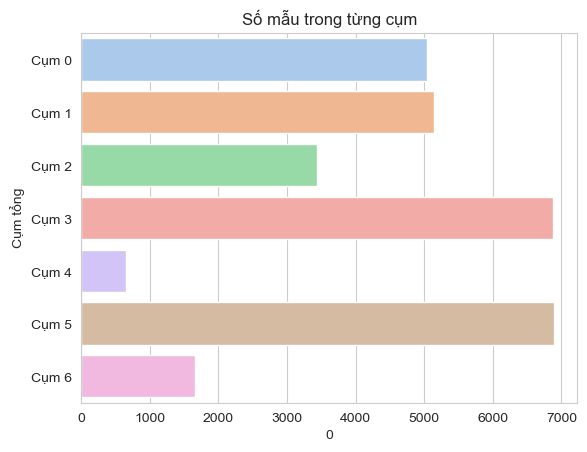

In [136]:
ax = sns.barplot(count_cum, y= 'Cụm tổng', x = 0)
plt.title('Số mẫu trong từng cụm')
plt.show();

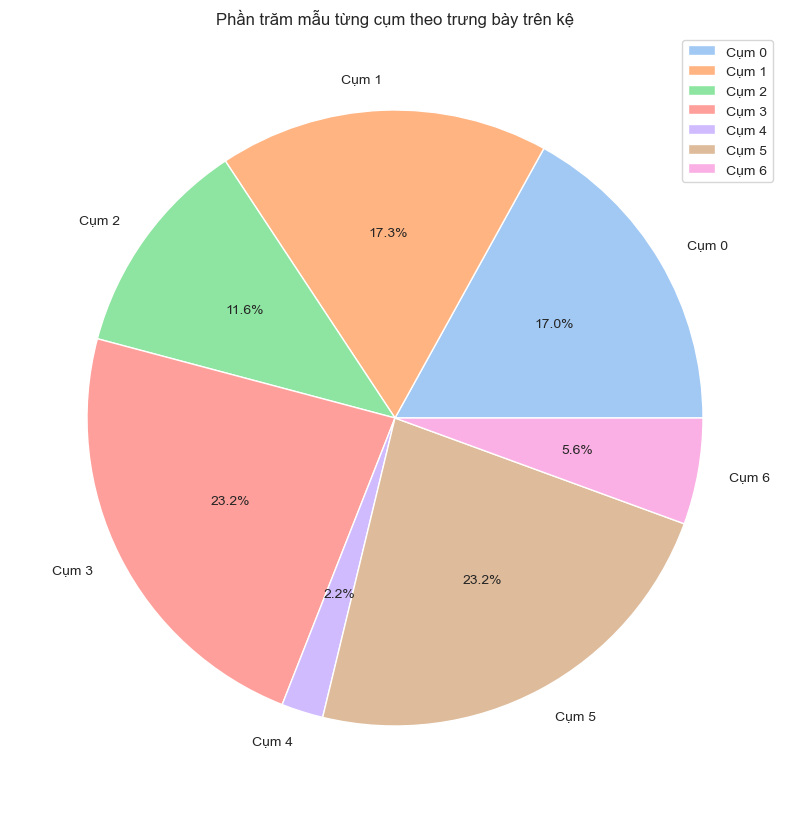

In [79]:
plt.figure(figsize=(10,10))
plt.title('Phần trăm mẫu từng cụm theo trưng bày trên kệ')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(count_cum[0], labels=count_cum['Cụm tổng'], autopct='%1.1f%%')
plt.legend()
plt.show();

# Tăng trưởng theo số lượng

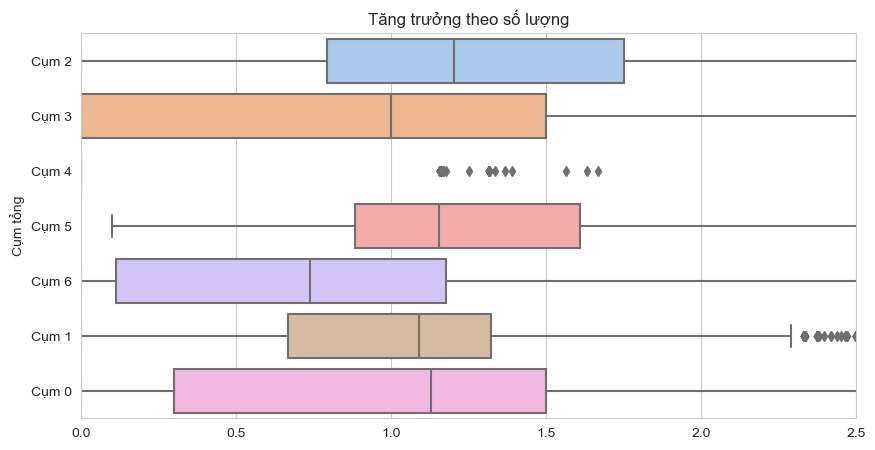

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_all_clus, y="Cụm tổng", x="TT theo so luong", hue="Cụm tổng", dodge=False).set(xlabel=None)
plt.xlim(0,2.5)
plt.legend([],[], frameon=False)
plt.title('Tăng trưởng theo số lượng')
plt.show();

- Cụm hiệu quả: Cụm 2, cụm 5
- Cụm không hiệu quả: Cụm 0, cụm 1, cụm 3, cụm 4

# Phân tích về sản phẩm:

## Khối lượng gram:

In [82]:
df_gram = df_all_clus.groupby(['Cụm tổng', 'Khối lượng gram']).size().reset_index()
df_gram.rename(columns={0: "count"}, inplace = True)
df_gram

,Cụm tổng,Khối lượng gram,count
0,Cụm 0,210,1598
1,Cụm 0,220,3441
2,Cụm 1,260,5142
3,Cụm 2,800,3436
4,Cụm 3,255,3432
5,Cụm 3,470,1728
6,Cụm 3,830,1721
7,Cụm 4,290,652
8,Cụm 5,500,6887
9,Cụm 6,450,1657


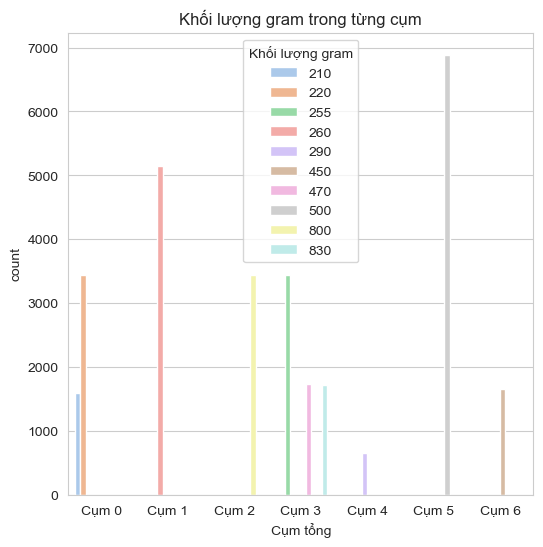

In [87]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_gram, x= 'Cụm tổng', y = 'count', hue = 'Khối lượng gram')
plt.title('Khối lượng gram trong từng cụm')
plt.show();

- Khối lượng cụm hiệu quả: 500 gram và 800 gram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


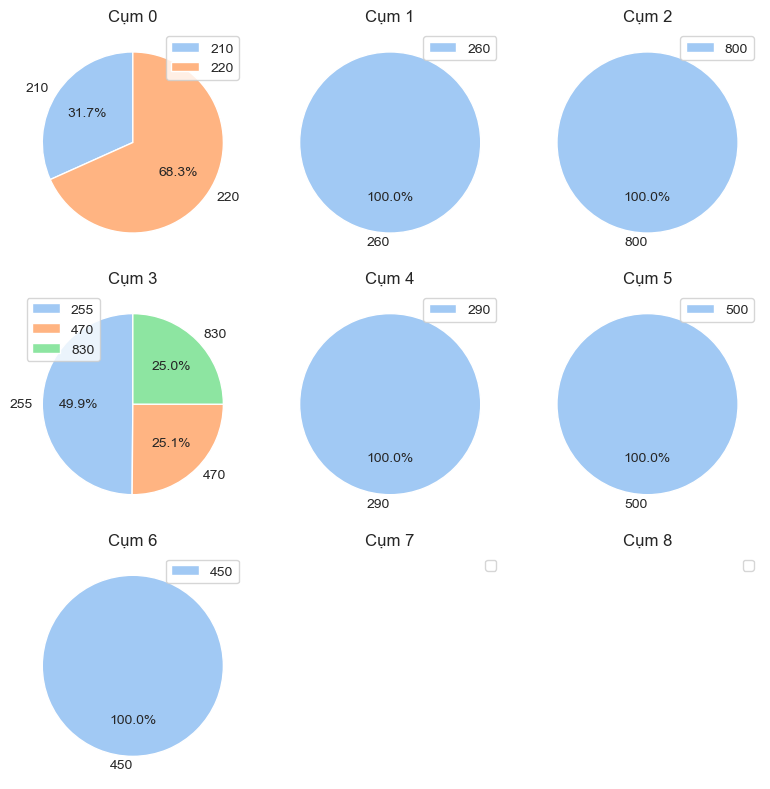

In [100]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_gram[df_gram['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Khối lượng gram'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

## Brand (thương hiệu):

In [88]:
df_brand = df_all_clus.groupby(['Cụm tổng', 'Brand']).size().reset_index()
df_brand.rename(columns={0: "count"}, inplace = True)
df_brand

,Cụm tổng,Brand,count
0,Cụm 0,KNORR,3441
1,Cụm 0,ÔNG CHÀ VÀ,1598
2,Cụm 1,BIBIGO,5142
3,Cụm 2,NAM DƯƠNG,3436
4,Cụm 3,CHOLIMEX,1721
5,Cụm 3,NAM DƯƠNG,5160
6,Cụm 4,ÔNG CHÀ VÀ,652
7,Cụm 5,CHINSU,6887
8,Cụm 6,KNORR,1657


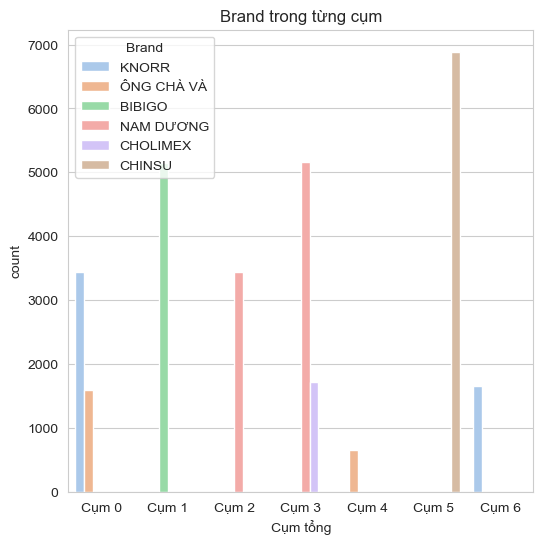

In [89]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_brand, x= 'Cụm tổng', y = 'count', hue = 'Brand')
plt.title('Brand trong từng cụm')
plt.show();

- Brand trong cụm hiệu quả: Nam Dương, Chinsu

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


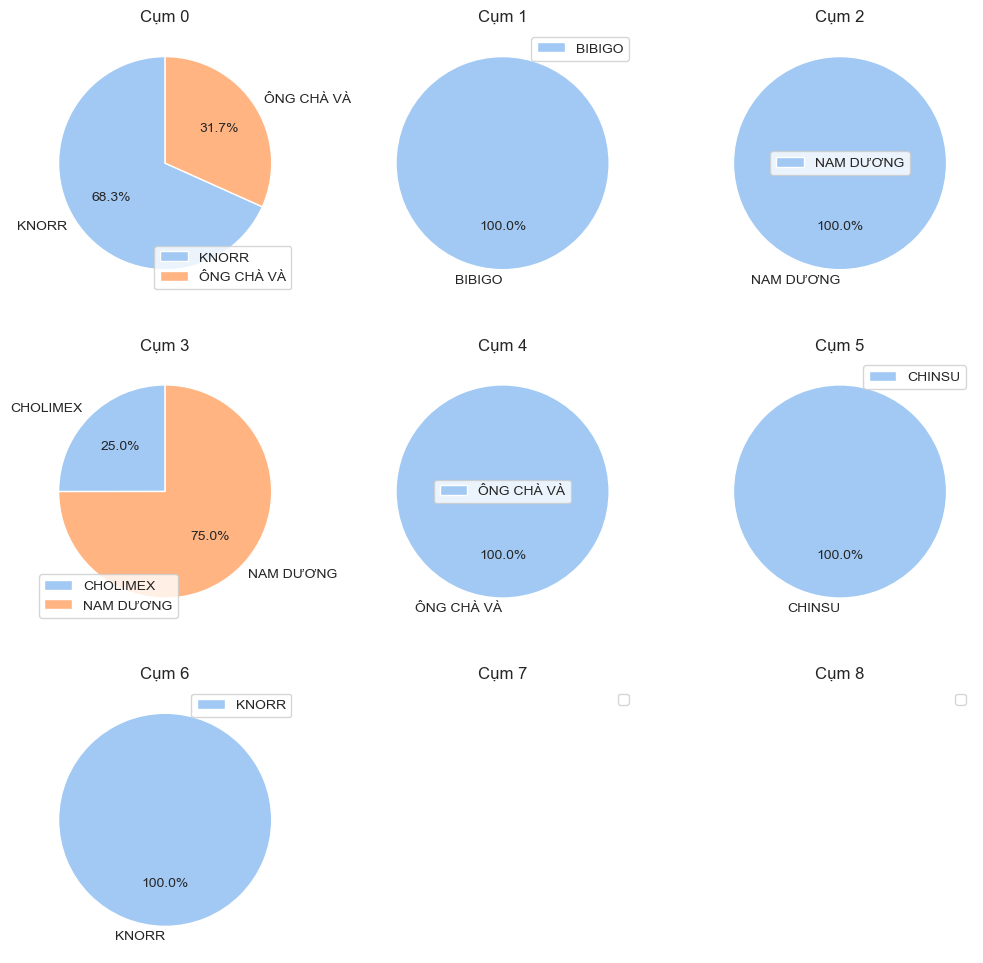

In [102]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_brand[df_brand['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Brand'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

## Đặc tính sản phẩm

In [90]:
df_char = df_all_clus.groupby(['Cụm tổng', 'Đặc tính sản phẩm2']).size().reset_index()
df_char.rename(columns={0: "count"}, inplace = True)
df_char

,Cụm tổng,Đặc tính sản phẩm2,count
0,Cụm 0,CAY,1719
1,Cụm 0,CAY ĐẬM,1722
2,Cụm 0,TƯƠNG ỚT XANH,1598
3,Cụm 1,VỊ HÀN QUỐC,5142
4,Cụm 2,CAY,3436
5,Cụm 3,CAY,6881
6,Cụm 4,CAY,652
7,Cụm 5,CAY,6887
8,Cụm 6,CAY ĐẬM,1657


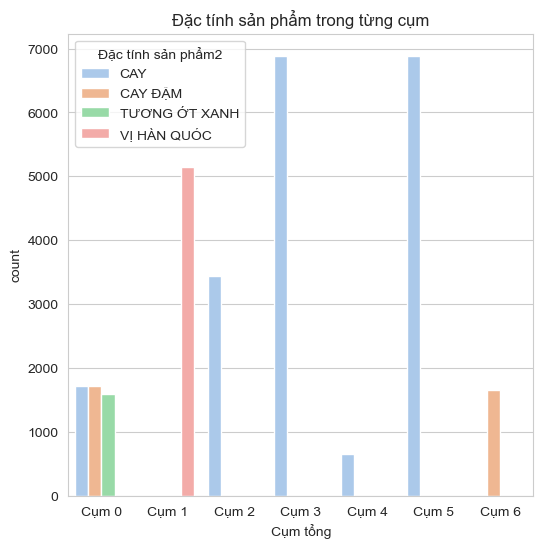

In [91]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_char, x= 'Cụm tổng', y = 'count', hue = 'Đặc tính sản phẩm2')
plt.title('Đặc tính sản phẩm trong từng cụm')
plt.show();

- Đặc tính sản phẩm trong cụm hiệu quả là tương ớt cay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


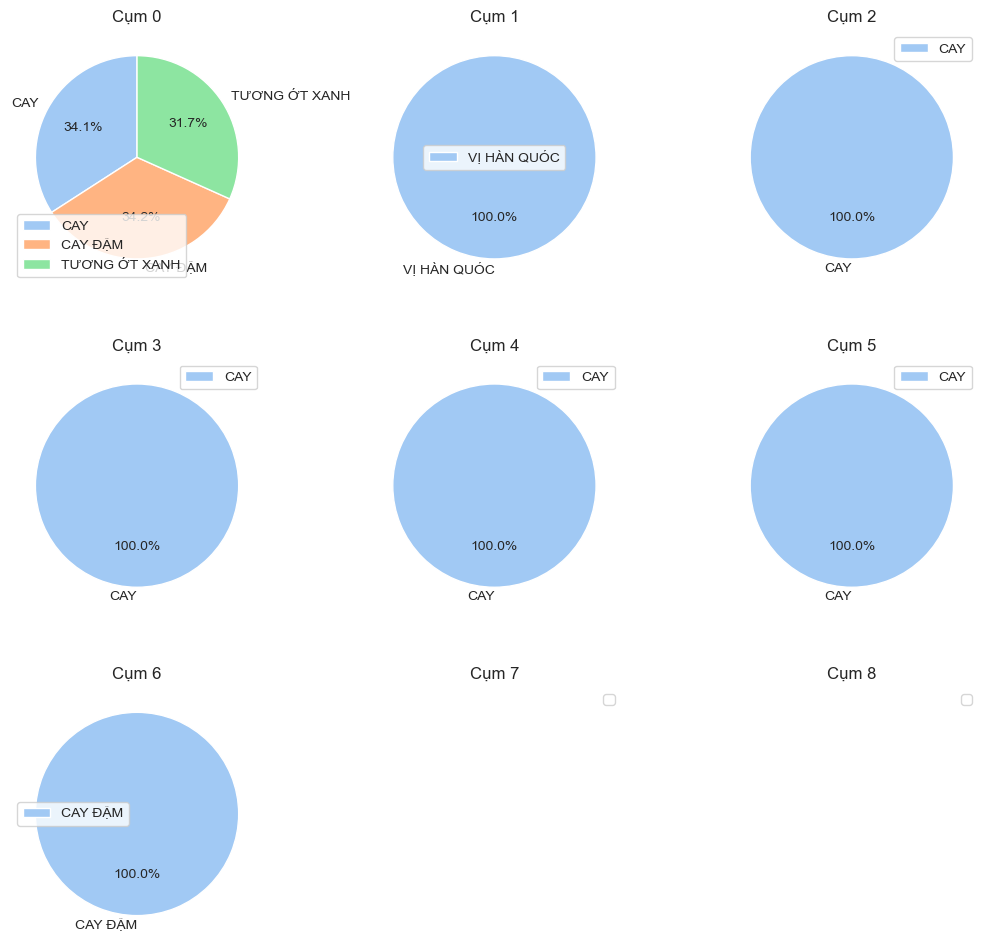

In [103]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_char[df_char['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Đặc tính sản phẩm2'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

## Phân loại size:

In [104]:
df_size = df_all_clus.groupby(['Cụm tổng', 'Phân loại size']).size().reset_index()
df_size.rename(columns={0: "count"}, inplace = True)
df_size

,Cụm tổng,Phân loại size,count
0,Cụm 0,NHỎ,5039
1,Cụm 1,NHỎ,5142
2,Cụm 2,LỚN,3436
3,Cụm 3,LỚN,1721
4,Cụm 3,NHỎ,3432
5,Cụm 3,TRUNG,1728
6,Cụm 4,NHỎ,652
7,Cụm 5,TRUNG,6887
8,Cụm 6,TRUNG,1657


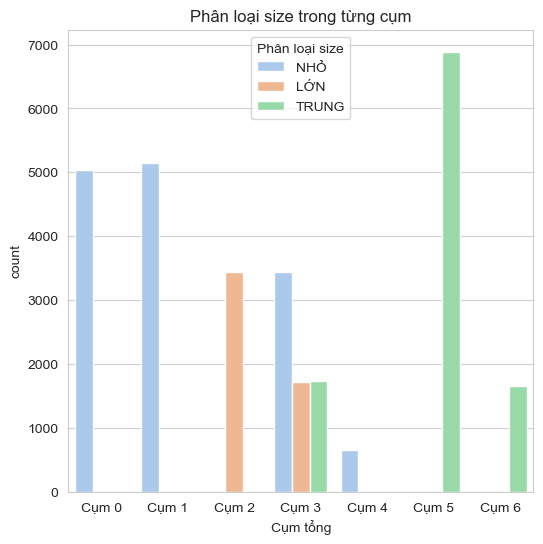

In [105]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_size, x= 'Cụm tổng', y = 'count', hue = 'Phân loại size')
plt.title('Phân loại size trong từng cụm')
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


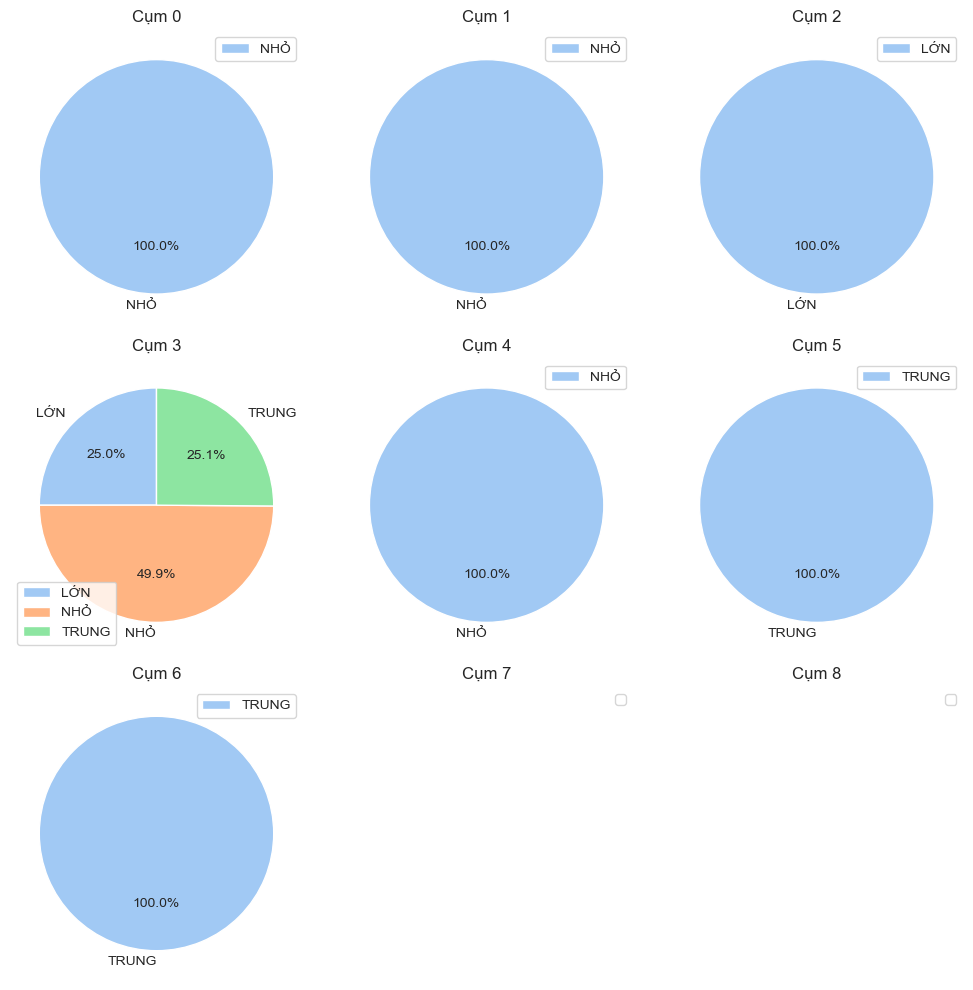

In [106]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_size[df_size['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Phân loại size'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

- Size trong cụm hiệu quả: Trung và lớn

## Phân loại sản phẩm

In [107]:
df_type = df_all_clus.groupby(['Cụm tổng', 'itemtype']).size().reset_index()
df_type.rename(columns={0: "count"}, inplace = True)
df_type

,Cụm tổng,itemtype,count
0,Cụm 0,A,109
1,Cụm 0,B,1229
2,Cụm 0,C,3701
3,Cụm 1,A,188
4,Cụm 1,B,688
5,Cụm 1,C,4266
6,Cụm 2,A,899
7,Cụm 2,B,1618
8,Cụm 2,C,919
9,Cụm 3,A,372


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


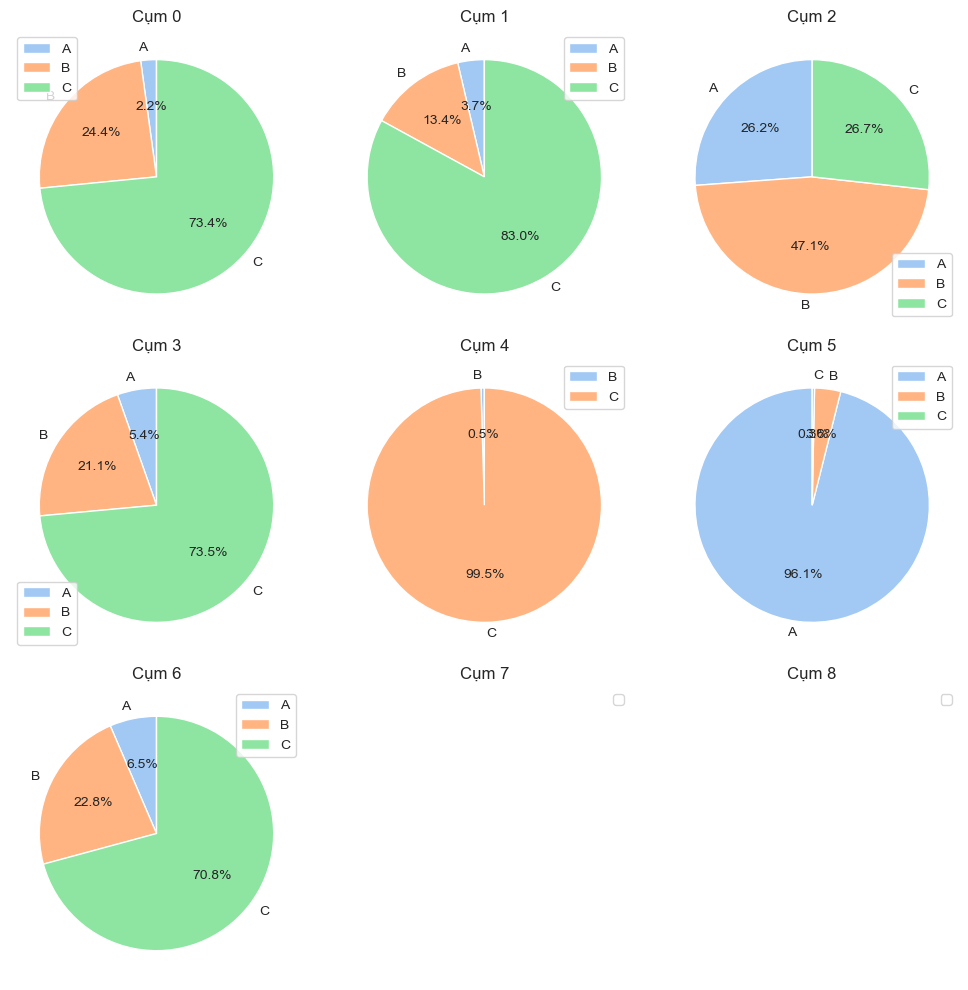

In [108]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_type[df_type['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['itemtype'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

- Phân loại sản phẩm trong cụm hiệu quả là A và B

## Giá/ 100 gram

In [111]:
df_price = df_all_clus.groupby(['Cụm tổng', 'Giá/100gram']).size().reset_index()
df_price.rename(columns={0: "count"}, inplace = True)
df_price

,Cụm tổng,Giá/100gram,count
0,Cụm 0,7272.727273,3441
1,Cụm 0,7857.142857,1598
2,Cụm 1,8846.153846,5142
3,Cụm 2,2625.000000,3436
4,Cụm 3,3518.072289,1721
5,Cụm 3,3553.191489,1728
6,Cụm 3,4235.294118,3432
7,Cụm 4,5344.827586,652
8,Cụm 5,5600.000000,6887
9,Cụm 6,5555.555556,1657


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


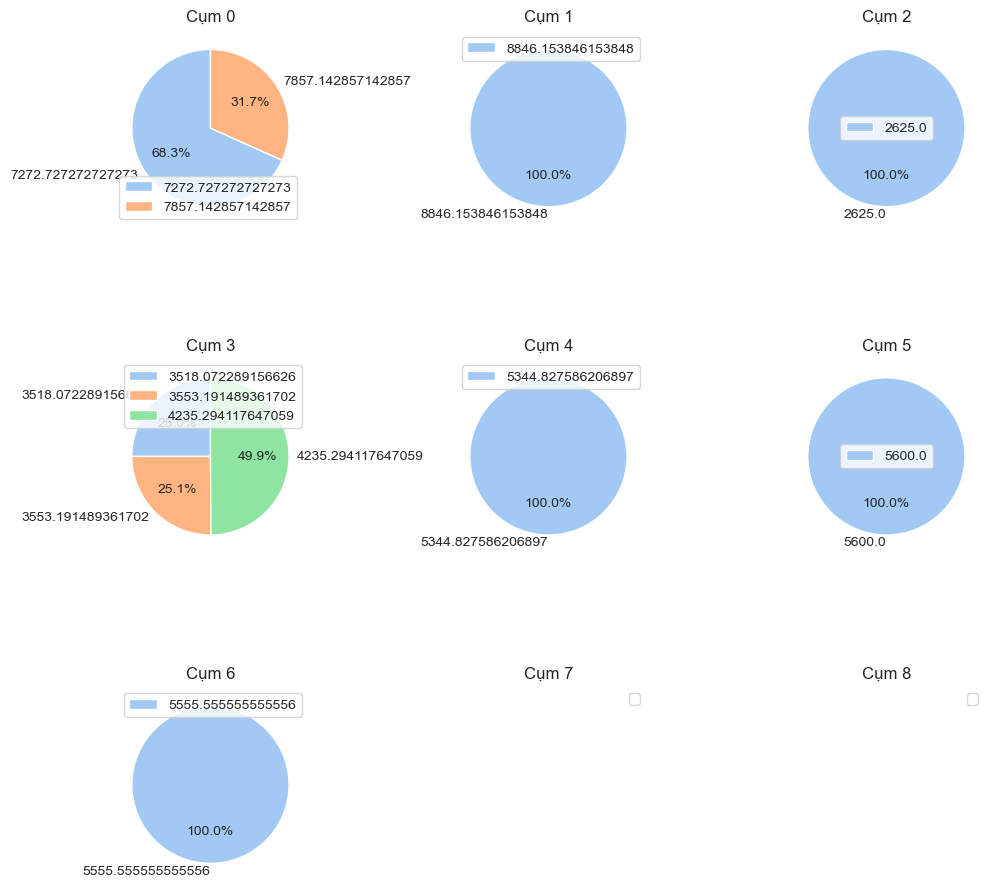

In [112]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_price[df_price['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Giá/100gram'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

- Giá trong cụm hiệu quả / 100 gram là 2,625.0 và 5,600.0

## Phân khúc giá:

In [113]:
df_price_group = df_all_clus.groupby(['Cụm tổng', 'Phân khúc giá']).size().reset_index()
df_price_group.rename(columns={0: "count"}, inplace = True)
df_price_group

,Cụm tổng,Phân khúc giá,count
0,Cụm 0,TRUNG,5039
1,Cụm 1,TRUNG,5142
2,Cụm 2,RẺ,3436
3,Cụm 3,RẺ,6881
4,Cụm 4,TRUNG,652
5,Cụm 5,TRUNG,6887
6,Cụm 6,TRUNG,1657


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


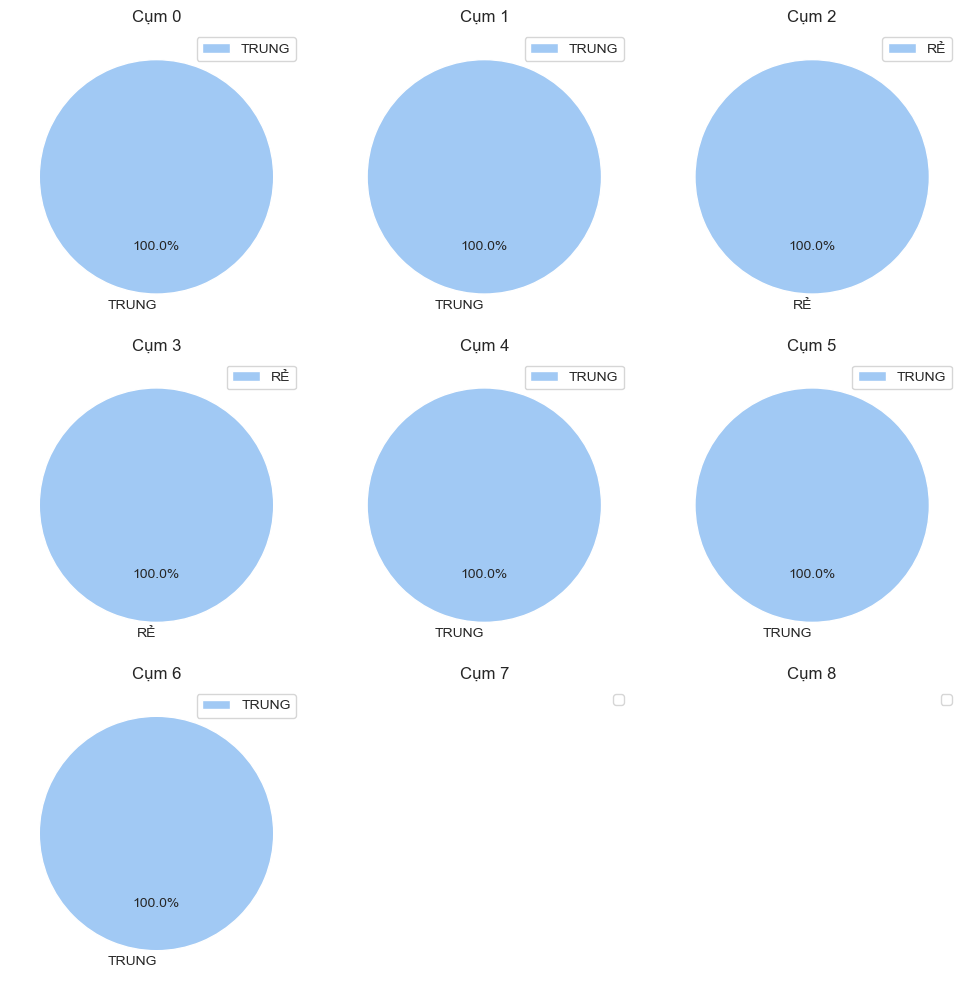

In [114]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_price_group[df_price_group['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Phân khúc giá'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

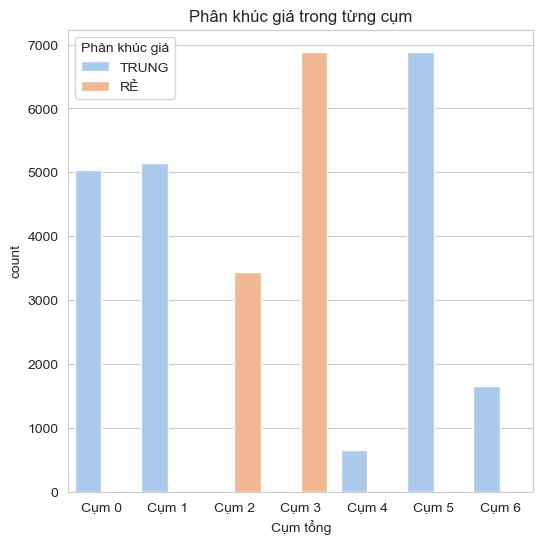

In [115]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_price_group, x= 'Cụm tổng', y = 'count', hue = 'Phân khúc giá')
plt.title('Phân khúc giá trong từng cụm')
plt.show();

- Phân khúc giá trong cụm hiệu quả: Trung (5,600 VND/gram) và Rẻ (2,625 VND/gram)

# Phân tích hiệu quả CTKM:

## Facing:

In [116]:
df_facing = df_all_clus.groupby(['Cụm tổng', 'facing']).size().reset_index()
df_facing.rename(columns={0: "count"}, inplace = True)
df_facing

,Cụm tổng,facing,count
0,Cụm 0,1,518
1,Cụm 0,2,2443
2,Cụm 0,3,1500
3,Cụm 0,4,532
4,Cụm 0,5,23
5,Cụm 0,6,17
6,Cụm 0,7,3
7,Cụm 0,8,3
8,Cụm 1,1,3781
9,Cụm 1,2,1094


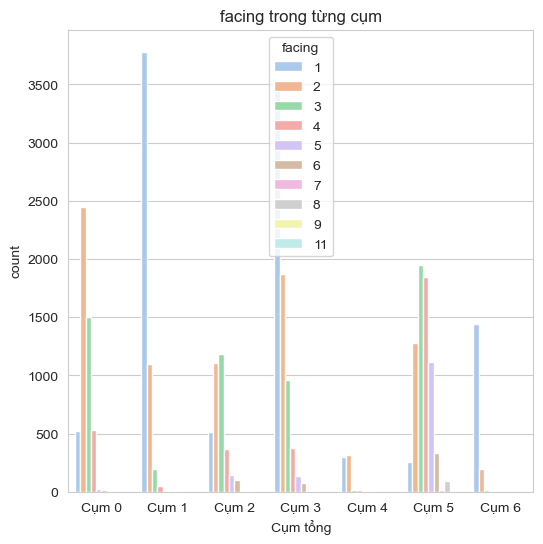

In [117]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_facing, x= 'Cụm tổng', y = 'count', hue = 'facing')
plt.title('facing trong từng cụm')
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


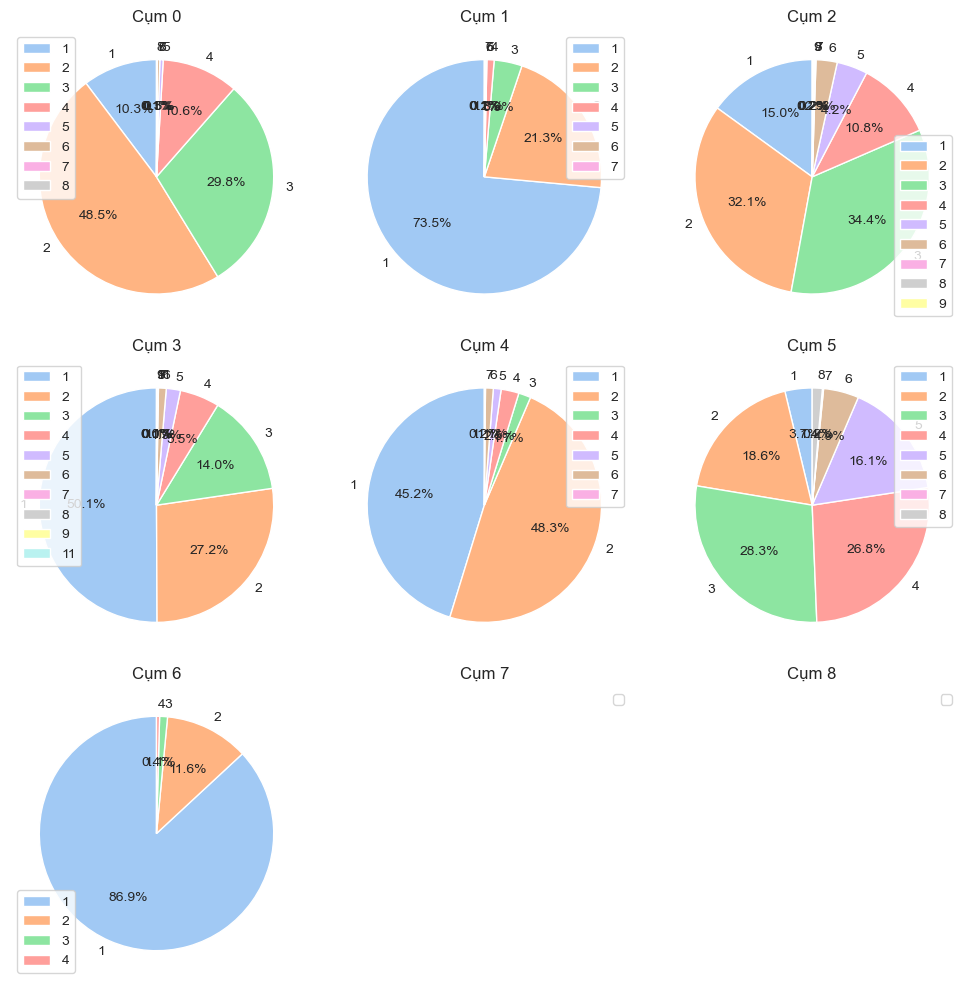

In [118]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_facing[df_facing['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['facing'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

- facing cụm hiệu quả là 2, 3, 4

## Hình thức khuyến mãi:

In [119]:
df_htkm = df_all_clus.groupby(['Cụm tổng', 'Hình thức KM']).size().reset_index()
df_htkm.rename(columns={0: "count"}, inplace = True)
df_htkm

,Cụm tổng,Hình thức KM,count
0,Cụm 0,Giảm giá,3441
1,Cụm 0,Mua 2 tặng 1,1598
2,Cụm 1,Giảm giá,5142
3,Cụm 2,Giảm giá,3436
4,Cụm 3,Giảm giá,3449
5,Cụm 3,Mua 2 tặng 1,3432
6,Cụm 4,Mua 2 tặng 1,652
7,Cụm 5,Giảm giá,6887
8,Cụm 6,Giảm giá,1657


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


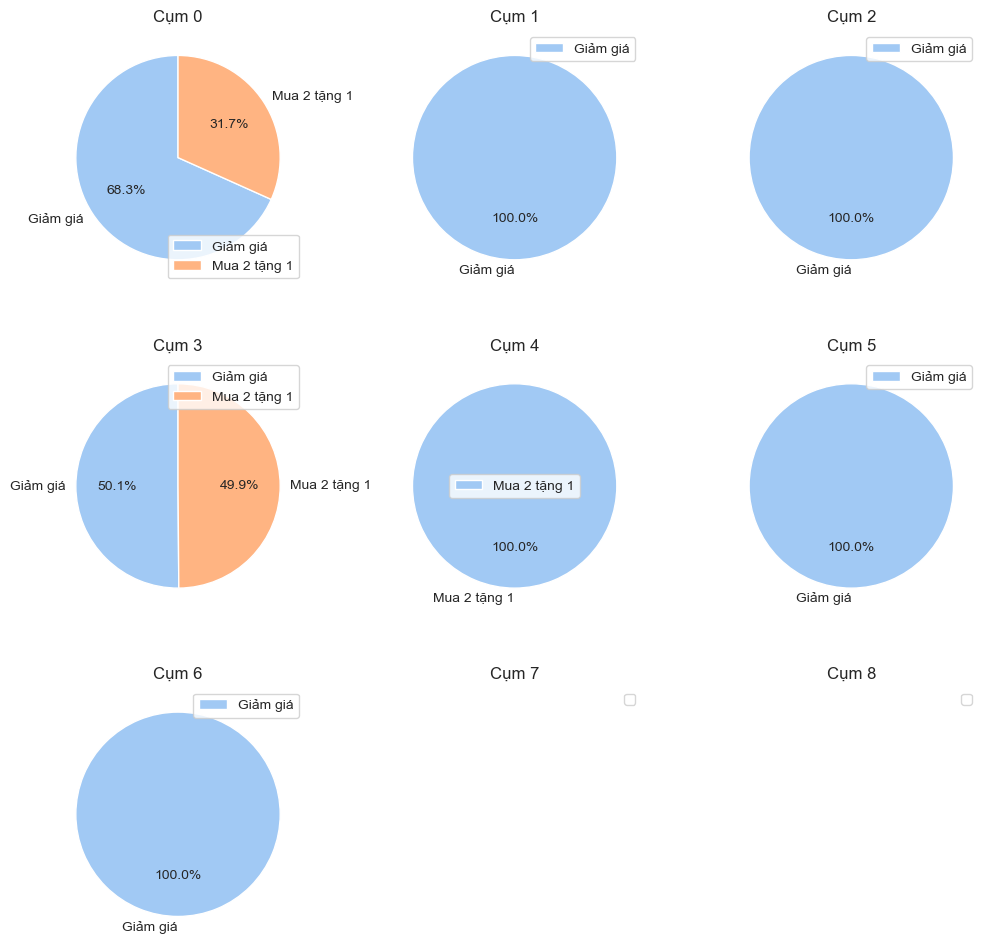

In [120]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_htkm[df_htkm['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Hình thức KM'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

- Hình thức khuyến mãi hiệu quả là giảm giá

## Thời gian khuyến mãi:

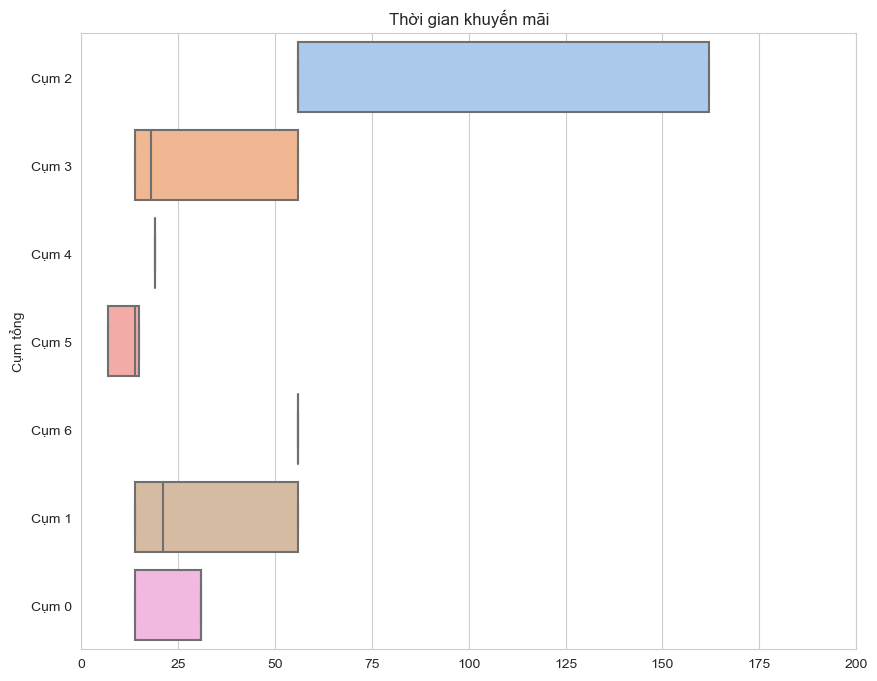

In [125]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_all_clus, y="Cụm tổng", x="TGKM", hue="Cụm tổng", dodge=False).set(xlabel=None)
plt.xlim(0,200)
plt.legend([],[], frameon=False)
plt.title('Thời gian khuyến mãi')
plt.show();

- Thời gian KM cụm hiệu quả: 56-162 ngày đối với sản phẩm size trung - giá rẻ, 7-14 ngày đối với sản phẩm size lớn - giá trung.

## Tỷ lệ khuyến mãi:

In [126]:
df_tlkm = df_all_clus.groupby('Cụm tổng')['Tỷ lệ KM'].mean().reset_index()
df_tlkm

,Cụm tổng,Tỷ lệ KM
0,Cụm 0,0.319128
1,Cụm 1,0.230201
2,Cụm 2,0.095238
3,Cụm 3,0.214978
4,Cụm 4,0.333400
5,Cụm 5,0.043777
6,Cụm 6,0.080000


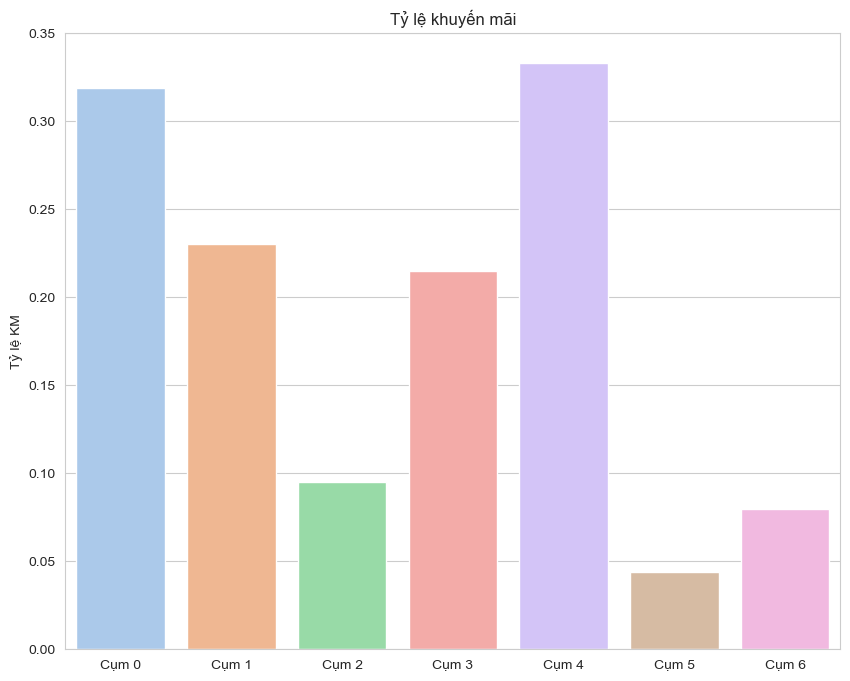

In [127]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_tlkm, x="Cụm tổng", y="Tỷ lệ KM", hue="Cụm tổng", dodge=False).set(xlabel=None)
plt.legend([],[], frameon=False)
plt.title('Tỷ lệ khuyến mãi')
plt.show();

- Tỷ lệ khuyến mãi trung bình của cụm hiệu quả tương đối thấp: khoảng 4.4% và 10%

## Quý:

In [128]:
df_quarter = df_all_clus.groupby(['Cụm tổng', 'quarter']).size().reset_index()
df_quarter.rename(columns={0: "count"}, inplace = True)
df_quarter

,Cụm tổng,quarter,count
0,Cụm 0,1,5039
1,Cụm 1,1,5142
2,Cụm 2,1,3436
3,Cụm 3,1,6881
4,Cụm 4,1,652
5,Cụm 5,1,6887
6,Cụm 6,1,1657


## Tỷ lệ ngày lễ/ TGKM

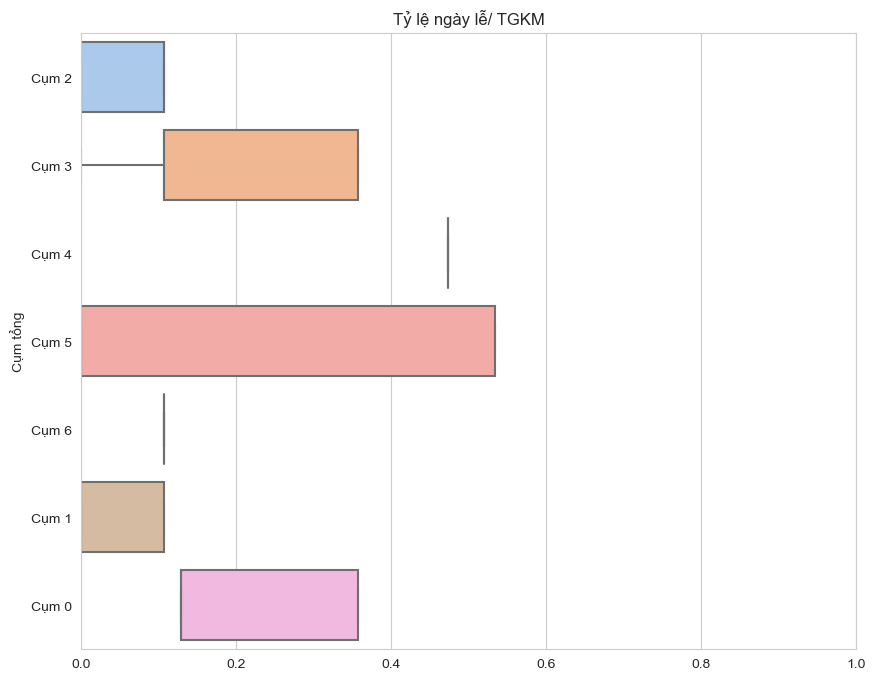

In [130]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_all_clus, y="Cụm tổng", x="pct_holiday", hue="Cụm tổng", dodge=False).set(xlabel=None)
plt.xlim(0,1)
plt.legend([],[], frameon=False)
plt.title('Tỷ lệ ngày lễ/ TGKM')
plt.show();

- Tỷ lệ ngày lễ/TGKM trong cụm hiệu quả là khoảng từ 0% đến 10 % hoặc từ 0% đến 55%

# Phân tích đặc điểm siêu thị hiệu quả:

## Miền:

In [131]:
df_mien = df_all_clus.groupby(['Cụm tổng', 'Miền']).size().reset_index()
df_mien.rename(columns={0: "count"}, inplace = True)
df_mien

,Cụm tổng,Miền,count
0,Cụm 0,Cao Nguyên,634
1,Cụm 0,HCM,1510
2,Cụm 0,Miền Tây,1714
3,Cụm 0,Miền Đông,1181
4,Cụm 1,Cao Nguyên,635
5,Cụm 1,HCM,1502
6,Cụm 1,Miền Tây,1715
7,Cụm 1,Miền Đông,1290
8,Cụm 2,Cao Nguyên,422
9,Cụm 2,HCM,1008


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


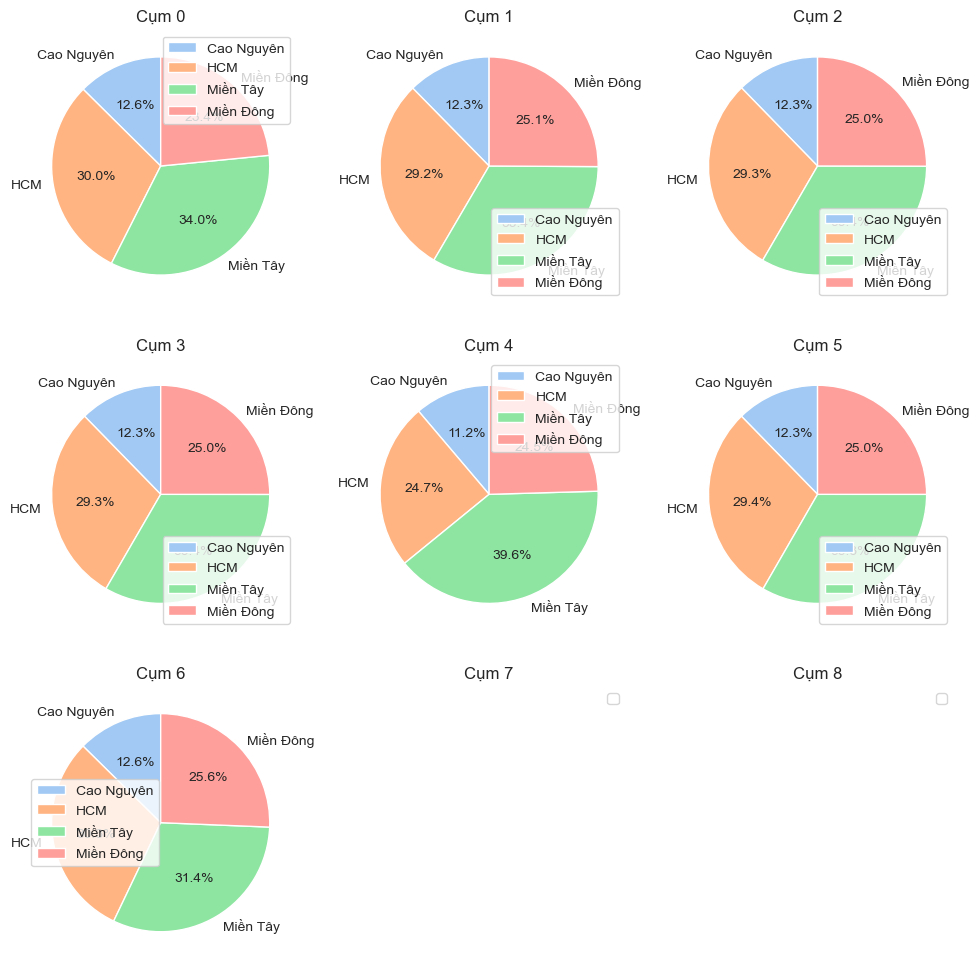

In [132]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_mien[df_mien['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Miền'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

## Mô hình ST:

In [133]:
df_model = df_all_clus.groupby(['Cụm tổng', 'Mô hình']).size().reset_index()
df_model.rename(columns={0: "count"}, inplace = True)
df_model

,Cụm tổng,Mô hình,count
0,Cụm 0,150m2,745
1,Cụm 0,200m2,2411
2,Cụm 0,300m2,1499
3,Cụm 0,400m2,384
4,Cụm 1,150m2,748
5,Cụm 1,200m2,2474
6,Cụm 1,300m2,1530
7,Cụm 1,400m2,390
8,Cụm 2,150m2,505
9,Cụm 2,200m2,1651


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


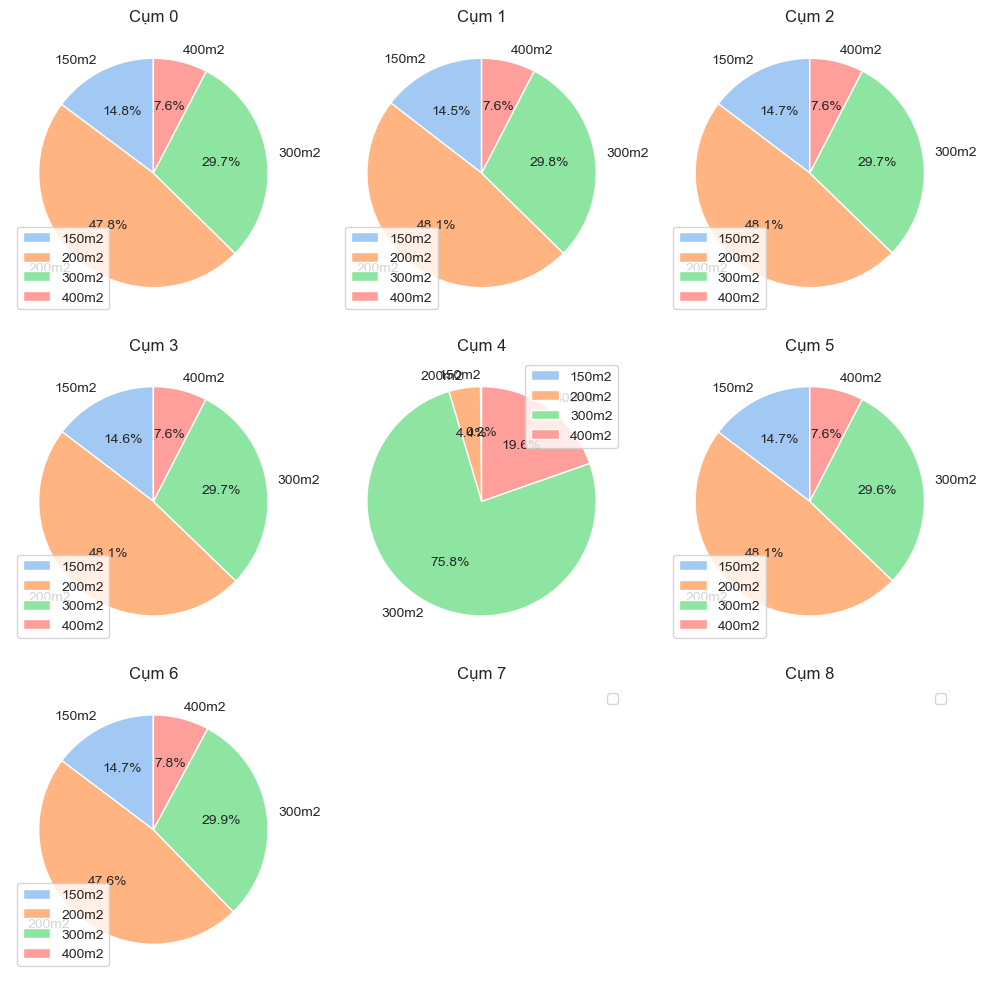

In [134]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_model[df_mien['Cụm tổng'] == f'Cụm {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Mô hình'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    ax.legend()

plt.tight_layout()
plt.show();

Các đặc điểm hiệu quả của năm 2022:
- Khuyến mãi dưới 14 ngày
- Hình thức giảm giá và mua 2 tặng 1
- Thương hiệu phổ biến: Chinsu, Cholimex, Knorr, Nam Dương
- Khẩu vị phổ thông
- Mức giá trung (5,600 - 7,900/100 gram)
- Size nhỏ (< 300 gram)

## Phân tích 6 đặc điểm hiệu quả:

In [164]:
df_hq_2023 = df_all_clus[['promotionname','Hình thức KM', 'Tỷ lệ KM', 'TGKM', 'Đặc tính sản phẩm', 'Brand', 'Khối lượng gram', 'Phân loại size', 'Giá/100gram', 'Phân khúc giá','TT theo so luong']]
df_hq_2023

,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng gram,Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong
4,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.095238,56,PHỔ THÔNG,NAM DƯƠNG,800,LỚN,2625.000000,RẺ,1.138902
5,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,Mua 2 tặng 1,0.333400,14,PHỔ THÔNG,NAM DƯƠNG,255,NHỎ,4235.294118,RẺ,6.000300
9,CTKM THÁNG 12 (19/12-01/01) -3288,Giảm giá,0.092466,14,PHỔ THÔNG,CHOLIMEX,830,LỚN,3518.072289,RẺ,2.285714
11,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.101796,56,PHỔ THÔNG,NAM DƯƠNG,470,TRUNG,3553.191489,RẺ,0.874942
14,CTKM THÁNG 12 (19/12-01/01) -3288,Giảm giá,0.092466,14,PHỔ THÔNG,CHOLIMEX,830,LỚN,3518.072289,RẺ,1.142857
...,...,...,...,...,...,...,...,...,...,...,...
29679,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,Mua 2 tặng 1,0.333400,14,TƯƠNG ỚT XANH,ÔNG CHÀ VÀ,210,NHỎ,7857.142857,TRUNG,0.000000
29680,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,1.193548
29689,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.130435,56,VỊ HÀN QUỐC,BIBIGO,260,NHỎ,8846.153846,TRUNG,1.142857
29691,CTKM THÁNG 2 (13/02-30/04) -3288,Giảm giá,0.130435,14,VỊ HÀN QUỐC,BIBIGO,260,NHỎ,8846.153846,TRUNG,1.142857


In [165]:
df_hq_2023['dump_htkm'] = 0
df_hq_2023['dump_size'] = 0
df_hq_2023['dump_tgkm'] = 0
df_hq_2023['dump_brand'] = 0
df_hq_2023['dump_character'] = 0
df_hq_2023['dump_price'] = 0

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/3781970479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq_2023['dump_htkm'] = 0
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/3781970479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq_2023['dump_size'] = 0
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/3781970479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [166]:
df_hq_2023.loc[(df_hq_2023['Hình thức KM'] == 'Giảm giá') | (df_hq_2023['Hình thức KM'] == 'Mua 2 tính tiền 1'), 'dump_htkm'] = 1
df_hq_2023.loc[(df_hq_2023['TGKM'] < 14), 'dump_tgkm'] = 1
df_hq_2023.loc[(df_hq_2023['Brand'] == 'CHINSU') | (df_hq_2023['Brand'] == 'CHOLIMEX') | (df_hq_2023['Brand'] == 'NAM DƯƠNG')| (df_hq_2023['Brand'] == 'KNORR'), 'dump_brand'] = 1
df_hq_2023.loc[df_hq_2023['Phân loại size'] == 'NHỎ', 'dump_size'] = 1
df_hq_2023.loc[(df_hq_2023['Giá/100gram'] >= 5600) & (df_hq_2023['Giá/100gram'] <= 7900), 'dump_price'] = 1
df_hq_2023.loc[df_hq_2023['Đặc tính sản phẩm'] == 'PHỔ THÔNG', 'dump_character'] = 1

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [167]:
df_hq_2023['sum_hq'] = df_hq_2023['dump_price'] + df_hq_2023['dump_size'] + df_hq_2023['dump_brand'] + df_hq_2023['dump_tgkm'] + df_hq_2023['dump_htkm']+ df_hq_2023['dump_character']
df_hq_2023

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2680412920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq_2023['sum_hq'] = df_hq_2023['dump_price'] + df_hq_2023['dump_size'] + df_hq_2023['dump_brand'] + df_hq_2023['dump_tgkm'] + df_hq_2023['dump_htkm']+ df_hq_2023['dump_character']


,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng gram,Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong,dump_htkm,dump_size,dump_tgkm,dump_brand,dump_character,dump_price,sum_hq
4,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.095238,56,PHỔ THÔNG,NAM DƯƠNG,800,LỚN,2625.000000,RẺ,1.138902,1,0,0,1,1,0,3
5,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,Mua 2 tặng 1,0.333400,14,PHỔ THÔNG,NAM DƯƠNG,255,NHỎ,4235.294118,RẺ,6.000300,0,1,0,1,1,0,3
9,CTKM THÁNG 12 (19/12-01/01) -3288,Giảm giá,0.092466,14,PHỔ THÔNG,CHOLIMEX,830,LỚN,3518.072289,RẺ,2.285714,1,0,0,1,1,0,3
11,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.101796,56,PHỔ THÔNG,NAM DƯƠNG,470,TRUNG,3553.191489,RẺ,0.874942,1,0,0,1,1,0,3
14,CTKM THÁNG 12 (19/12-01/01) -3288,Giảm giá,0.092466,14,PHỔ THÔNG,CHOLIMEX,830,LỚN,3518.072289,RẺ,1.142857,1,0,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29679,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,Mua 2 tặng 1,0.333400,14,TƯƠNG ỚT XANH,ÔNG CHÀ VÀ,210,NHỎ,7857.142857,TRUNG,0.000000,0,1,0,0,0,1,2
29680,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,1.193548,1,1,0,1,1,1,5
29689,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.130435,56,VỊ HÀN QUỐC,BIBIGO,260,NHỎ,8846.153846,TRUNG,1.142857,1,1,0,0,0,0,2
29691,CTKM THÁNG 2 (13/02-30/04) -3288,Giảm giá,0.130435,14,VỊ HÀN QUỐC,BIBIGO,260,NHỎ,8846.153846,TRUNG,1.142857,1,1,0,0,0,0,2


In [168]:
df_mau_hq_2023 = df_hq_2023[df_hq_2023['sum_hq'] == 5]
df_mau_hq_2023

,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng gram,Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong,dump_htkm,dump_size,dump_tgkm,dump_brand,dump_character,dump_price,sum_hq
1,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,1.151512,1,0,1,1,1,1,5
20,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,0.789470,1,0,1,1,1,1,5
49,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,0.999980,1,0,1,1,1,1,5
55,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,1.198201,1,0,1,1,1,1,5
73,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,0.833375,1,0,1,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29656,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,0.752638,1,1,0,1,1,1,5
29671,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,1.129032,1,1,0,1,1,1,5
29672,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,0.564544,1,1,0,1,1,1,5
29678,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,0.902955,1,1,0,1,1,1,5


In [169]:
df_mau_tt_hq_2023 = df_mau_hq_2023[df_mau_hq_2023['TT theo so luong'] >= 1.2]
df_mau_tt_hq_2023

,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng gram,Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong,dump_htkm,dump_size,dump_tgkm,dump_brand,dump_character,dump_price,sum_hq
87,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,1.562510,1,0,1,1,1,1,5
150,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,3.750188,1,0,1,1,1,1,5
177,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,1.999983,1,0,1,1,1,1,5
205,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,1.312508,1,0,1,1,1,1,5
213,CTKM BỔ SUNG THÁNG 2 (20/02-05/03) -3288,Giảm giá,0.053571,7,PHỔ THÔNG,CHINSU,500,TRUNG,5600.000000,TRUNG,1.352925,1,0,1,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29607,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,1.612903,1,1,0,1,1,1,5
29618,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,1.258065,1,1,0,1,1,1,5
29620,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,1.451613,1,1,0,1,1,1,5
29639,CTKM THÁNG 12 (30/12-29/01) - 3288,Giảm giá,0.312500,31,PHỔ THÔNG,KNORR,220,NHỎ,7272.727273,TRUNG,1.375000,1,1,0,1,1,1,5


In [157]:
data_count = {'DataFrame': ['Số mẫu không hiệu quả chứa đặc điểm của năm 2022', 'Số mẫu hiệu quả có chứa đặc điểm của năm 2022'],
        'Số mẫu': [(5168 - 2491), 2491]}
df_count_hq2023 = pd.DataFrame(data_count)
df_count_hq2023

,DataFrame,Số mẫu
0,Số mẫu không hiệu quả chứa đặc điểm của năm 2022,2677
1,Số mẫu hiệu quả có chứa đặc điểm của năm 2022,2491


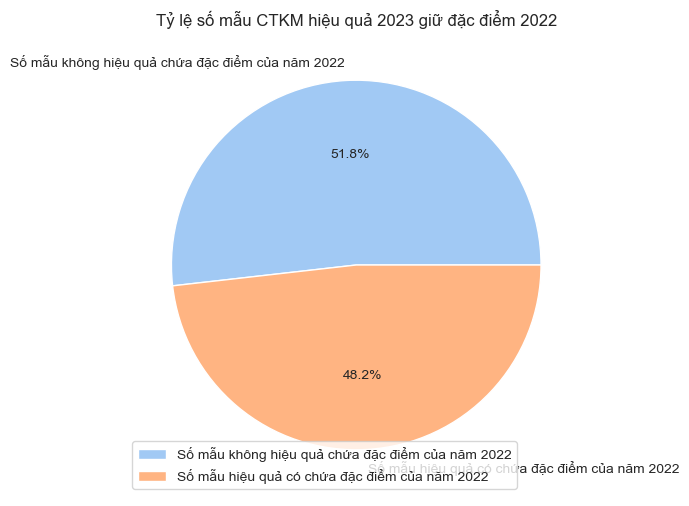

In [158]:
plt.figure(figsize=(6,6))
plt.title('Tỷ lệ số mẫu CTKM hiệu quả 2023 giữ đặc điểm 2022')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(df_count_hq2023['Số mẫu'], labels=df_count_hq2023['DataFrame'], autopct='%1.1f%%')
plt.legend()
plt.show();

# Import Data 2022:

In [170]:
df_2022 = pd.read_excel('data_processed_2022_updated.xlsx')
df_2022

,stt,promotionid,promotionname,productid,storeid,itemid,statusname,facing,itemtype,promoquantity,...,Loại ST,Đặc tính sản phẩm,Đặc tính sản phẩm2,Brand,is_popular_brand,Khối lượng tịnh (gram),Giá/100gram,Khối lượng,Phân loại size,Phân khúc giá
0,1,462514,CTKM tháng 3 - (23/03-29/03) - -3288,1053109000068,9254,1910000362,KD bình thường,4,A,8,...,"1,2 tỷ - < 2 tỷ",PHỔ THÔNG,CAY,CHINSU,1,500G,5300.000000,500,TRUNG,TRUNG
1,2,444025,CTKM tháng 2 - (16/02-01/03) - 3288,1053109000020,4361,1803000852,KD bình thường,4,C,0,...,"1,2 tỷ - < 2 tỷ",PHỔ THÔNG,CAY,NAM DƯƠNG,1,250G,16000.000000,250,NHỎ,RẺ
2,3,486312,CTKM tháng 4 - (20/04-26/06) - 3288,1053109000068,9254,1910000362,KD bình thường,4,B,88,...,"1,2 tỷ - < 2 tỷ",PHỔ THÔNG,CAY,CHINSU,1,500G,5300.000000,500,TRUNG,TRUNG
3,4,700398,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,1053109000151,6691,2206001907,KD bình thường,1,C,39,...,"1,2 tỷ - < 2 tỷ",PHỔ THÔNG,CAY,NAM DƯƠNG,1,255G,17254.901961,255,NHỎ,RẺ
4,5,697499,CTKM THÁNG 12 (19/12-01/01) -3288,9892840000187,7237,1608000500,KD bình thường,1,B,10,...,"900 triệu - <1,2 tỷ",PHỔ THÔNG,CAY,CHOLIMEX,1,830G,1807.228916,830,LỚN,RẺ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114060,114061,462514,CTKM tháng 3 - (23/03-29/03) - -3288,1053109000068,5278,1910000362,KD bình thường,5,A,9,...,"900 triệu - <1,2 tỷ",PHỔ THÔNG,CAY,CHINSU,1,500G,5300.000000,500,TRUNG,TRUNG
114061,114062,486312,CTKM tháng 4 - (20/04-26/06) - 3288,1053109000068,5278,1910000362,KD bình thường,5,A,101,...,"900 triệu - <1,2 tỷ",PHỔ THÔNG,CAY,CHINSU,1,500G,5300.000000,500,TRUNG,TRUNG
114062,114063,548261,CTKM THÁNG 7 (30/06-10/07) Mua 8 tặng 1- 1190,1053109000068,5278,1910000362,KD bình thường,5,A,0,...,"900 triệu - <1,2 tỷ",PHỔ THÔNG,CAY,CHINSU,1,500G,5300.000000,500,TRUNG,TRUNG
114063,114064,624216,CTKM THÁNG 9 (19/09-02/10) - 3288,1053109000068,5278,1910000362,KD bình thường,5,A,22,...,"900 triệu - <1,2 tỷ",PHỔ THÔNG,CAY,CHINSU,1,500G,5300.000000,500,TRUNG,TRUNG


Các đặc điểm hiệu quả 2022:
- Hình thức KM Giảm giá
- TGKM: Dài hạn (56-160 ngày); Ngắn hạn (8-14 ngày)
- Thương hiệu nổi tiếng: Chinsu, Nam Dương
- Khẩu vị phổ thông
- Size trung, lớn
- Giá rẻ, trung

In [173]:
df_hq_2022 = df_2022[['promotionname','Hình thức KM', 'Tỷ lệ KM', 'TGKM', 'Đặc tính sản phẩm', 'Brand', 'Khối lượng tịnh (gram)', 'Phân loại size', 'Giá/100gram', 'Phân khúc giá','TT theo so luong3']]
df_hq_2022

,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng tịnh (gram),Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong3
0,CTKM tháng 3 - (23/03-29/03) - -3288,Giảm giá,0.0393,7,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,2.666489
1,CTKM tháng 2 - (16/02-01/03) - 3288,Giảm giá,0.0513,14,PHỔ THÔNG,NAM DƯƠNG,250G,NHỎ,16000.000000,RẺ,0.000000
2,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,7.163149
3,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,Mua 2 tặng 1,0.3334,14,PHỔ THÔNG,NAM DƯƠNG,255G,NHỎ,17254.901961,RẺ,11.375569
4,CTKM THÁNG 12 (19/12-01/01) -3288,Giảm giá,0.0925,14,PHỔ THÔNG,CHOLIMEX,830G,LỚN,1807.228916,RẺ,0.833375
...,...,...,...,...,...,...,...,...,...,...,...
114060,CTKM tháng 3 - (23/03-29/03) - -3288,Giảm giá,0.0393,7,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,1.124958
114061,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,0.855932
114062,CTKM THÁNG 7 (30/06-10/07) Mua 8 tặng 1- 1190,Mua 8 tặng 1,0.1111,11,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,0.000000
114063,CTKM THÁNG 9 (19/09-02/10) - 3288,Giảm giá,0.0393,14,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,1.099978


In [174]:
df_hq_2022['dump_htkm'] = 0
df_hq_2022['dump_size'] = 0
df_hq_2022['dump_tgkm'] = 0
df_hq_2022['dump_brand'] = 0
df_hq_2022['dump_character'] = 0
df_hq_2022['dump_price'] = 0

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2447718467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq_2022['dump_htkm'] = 0
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2447718467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq_2022['dump_size'] = 0
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/2447718467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [175]:
df_hq_2022.loc[df_hq_2022['Hình thức KM'] == 'Giảm giá', 'dump_htkm'] = 1
df_hq_2022.loc[((df_hq_2022['TGKM'] <= 14) & (df_hq_2022['TGKM'] >= 8))| ((df_hq_2022['TGKM'] <= 160) & (df_hq_2022['TGKM'] >= 56)), 'dump_tgkm'] = 1
df_hq_2022.loc[(df_hq_2022['Brand'] == 'CHINSU') | (df_hq_2022['Brand'] == 'NAM DƯƠNG'), 'dump_brand'] = 1
df_hq_2022.loc[(df_hq_2022['Phân loại size'] == 'LỚN')|(df_hq_2022['Phân loại size'] == 'TRUNG'), 'dump_size'] = 1
df_hq_2022.loc[(df_hq_2022['Phân khúc giá'] == 'RẺ') | (df_hq_2022['Phân khúc giá'] == 'TRUNG'), 'dump_price'] = 1
df_hq_2022.loc[df_hq_2022['Đặc tính sản phẩm'] == 'PHỔ THÔNG', 'dump_character'] = 1

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [176]:
df_hq_2022['sum_hq'] = df_hq_2022['dump_price'] + df_hq_2022['dump_size'] + df_hq_2022['dump_brand'] + df_hq_2022['dump_tgkm'] + df_hq_2022['dump_htkm']+ df_hq_2022['dump_character']
df_hq_2022

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_32667/1442254673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq_2022['sum_hq'] = df_hq_2022['dump_price'] + df_hq_2022['dump_size'] + df_hq_2022['dump_brand'] + df_hq_2022['dump_tgkm'] + df_hq_2022['dump_htkm']+ df_hq_2022['dump_character']


,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng tịnh (gram),Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong3,dump_htkm,dump_size,dump_tgkm,dump_brand,dump_character,dump_price,sum_hq
0,CTKM tháng 3 - (23/03-29/03) - -3288,Giảm giá,0.0393,7,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,2.666489,1,1,0,1,1,1,5
1,CTKM tháng 2 - (16/02-01/03) - 3288,Giảm giá,0.0513,14,PHỔ THÔNG,NAM DƯƠNG,250G,NHỎ,16000.000000,RẺ,0.000000,1,0,1,1,1,1,5
2,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,7.163149,1,1,1,1,1,1,6
3,CTKM THÁNG 12 (19/12-01/01) MUA 2 TẶNG 1- 3288,Mua 2 tặng 1,0.3334,14,PHỔ THÔNG,NAM DƯƠNG,255G,NHỎ,17254.901961,RẺ,11.375569,0,0,1,1,1,1,4
4,CTKM THÁNG 12 (19/12-01/01) -3288,Giảm giá,0.0925,14,PHỔ THÔNG,CHOLIMEX,830G,LỚN,1807.228916,RẺ,0.833375,1,1,1,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114060,CTKM tháng 3 - (23/03-29/03) - -3288,Giảm giá,0.0393,7,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,1.124958,1,1,0,1,1,1,5
114061,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,0.855932,1,1,1,1,1,1,6
114062,CTKM THÁNG 7 (30/06-10/07) Mua 8 tặng 1- 1190,Mua 8 tặng 1,0.1111,11,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,0.000000,0,1,1,1,1,1,5
114063,CTKM THÁNG 9 (19/09-02/10) - 3288,Giảm giá,0.0393,14,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,1.099978,1,1,1,1,1,1,6


In [178]:
df_mau_hq_2022 = df_hq_2022[df_hq_2022['sum_hq'] == 6]
df_mau_hq_2022

,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng tịnh (gram),Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong3,dump_htkm,dump_size,dump_tgkm,dump_brand,dump_character,dump_price,sum_hq
2,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.0,TRUNG,7.163149,1,1,1,1,1,1,6
5,CTKM tháng 2 - (16/02-01/03) - 3288,Giảm giá,0.0476,14,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.5,RẺ,0.499990,1,1,1,1,1,1,6
10,CTKM THÁNG 9 (19/09-02/10) - 3288,Giảm giá,0.0393,14,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.0,TRUNG,1.166667,1,1,1,1,1,1,6
12,CTKM THÁNG 10 (24/10-06/11) - 3288,Giảm giá,0.0393,14,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.0,TRUNG,1.236836,1,1,1,1,1,1,6
23,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.0952,56,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.5,RẺ,0.958269,1,1,1,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114051,CTKM tháng 2 - (16/02-01/03) - 3288,Giảm giá,0.0476,14,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.5,RẺ,0.933315,1,1,1,1,1,1,6
114056,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.0952,56,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.5,RẺ,1.447603,1,1,1,1,1,1,6
114061,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.0,TRUNG,0.855932,1,1,1,1,1,1,6
114063,CTKM THÁNG 9 (19/09-02/10) - 3288,Giảm giá,0.0393,14,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.0,TRUNG,1.099978,1,1,1,1,1,1,6


In [179]:
df_mau_tt_hq_2022 = df_mau_hq_2022[df_mau_hq_2022['TT theo so luong3'] >= 1.2]
df_mau_tt_hq_2022

,promotionname,Hình thức KM,Tỷ lệ KM,TGKM,Đặc tính sản phẩm,Brand,Khối lượng tịnh (gram),Phân loại size,Giá/100gram,Phân khúc giá,TT theo so luong3,dump_htkm,dump_size,dump_tgkm,dump_brand,dump_character,dump_price,sum_hq
2,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,7.163149,1,1,1,1,1,1,6
12,CTKM THÁNG 10 (24/10-06/11) - 3288,Giảm giá,0.0393,14,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,1.236836,1,1,1,1,1,1,6
72,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.1018,56,PHỔ THÔNG,NAM DƯƠNG,470G,TRUNG,3510.638298,RẺ,1.624513,1,1,1,1,1,1,6
184,CTKM THÁNG 10 (24/10-06/11) - 3288,Giảm giá,0.0393,14,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,1.282058,1,1,1,1,1,1,6
277,CTKM tháng 4 - (20/04-26/06) - 3288,Giảm giá,0.0393,72,PHỔ THÔNG,CHINSU,500G,TRUNG,5300.000000,TRUNG,1.301587,1,1,1,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113993,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.0952,56,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.500000,RẺ,1.375069,1,1,1,1,1,1,6
114010,CTKM tháng 2 - (16/02-01/03) - 3288,Giảm giá,0.0476,14,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.500000,RẺ,3.250163,1,1,1,1,1,1,6
114016,CTKM tháng 2 - (16/02-01/03) - 3288,Giảm giá,0.0476,14,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.500000,RẺ,1.435802,1,1,1,1,1,1,6
114024,CTKM THÁNG 12 (05/12-29/01) - 3288,Giảm giá,0.0952,56,PHỔ THÔNG,NAM DƯƠNG,800G,LỚN,3312.500000,RẺ,1.247248,1,1,1,1,1,1,6


In [180]:
data_count = {'DataFrame': ['Số mẫu không hiệu quả chứa đặc điểm của năm 2023', 'Số mẫu hiệu quả có chứa đặc điểm của năm 2023'],
        'Số mẫu': [(10250 - 4194), 4194]}
df_count_hq2022 = pd.DataFrame(data_count)
df_count_hq2022

,DataFrame,Số mẫu
0,Số mẫu không hiệu quả chứa đặc điểm của năm 2023,6056
1,Số mẫu hiệu quả có chứa đặc điểm của năm 2023,4194


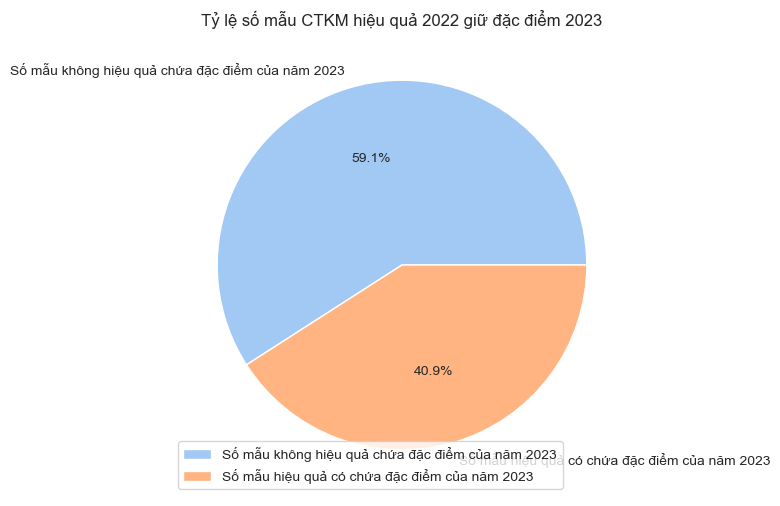

In [181]:
plt.figure(figsize=(6,6))
plt.title('Tỷ lệ số mẫu CTKM hiệu quả 2022 giữ đặc điểm 2023')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(df_count_hq2022['Số mẫu'], labels=df_count_hq2022['DataFrame'], autopct='%1.1f%%')
plt.legend()
plt.show();